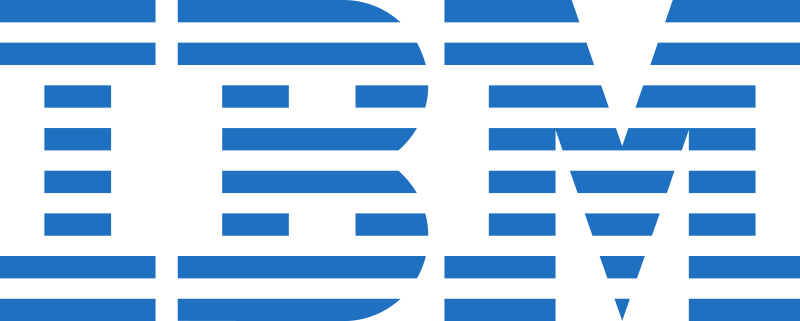

In [1]:
from IPython.display import Image
Image("IBM.svg.png")

# Business Problem

International Business Machine Corporation, commonly known as IBM is a multinational company which produce and sell its own computer hardwar and softwares, along with the cloud computing and data analytics.

Recently, the **attrition rate** (*rate at which people leave the company*) has increased, this is impacting the Company as it increase the training cost and reducing the production time of the company.

The company wants to dig deeper in the issue and want to know the reason behind increasing attrition rate, so it can take all the necessary steps to retain the employees.

To look for solution of the above mentioned problem, we need to do detailed exploratory data analysis to know which factors are the main cause of leavin the organisation. In order to reach any conclusion, we would analyse the following details of the employees:

- Personal information of the employees (Age, Gender, Relationship, Distance from Home)
- Lack of Motivation Factor (Salary, Last Hike on the basis of Performance, Stock Option, Last Promotion)
- Are they overloaded with work (Business Travel, Overtime)
- Are their skills getting updated? (Training, Job_Satisfaction)
- Are they facing any issue at the workplace? (Deptt, Years under same supervisor)
- Are we hiring the right personnel? (how many companies they have changed and from how long they are working here)
- Is the work very Monotonous? (from how long they are doing the same job)

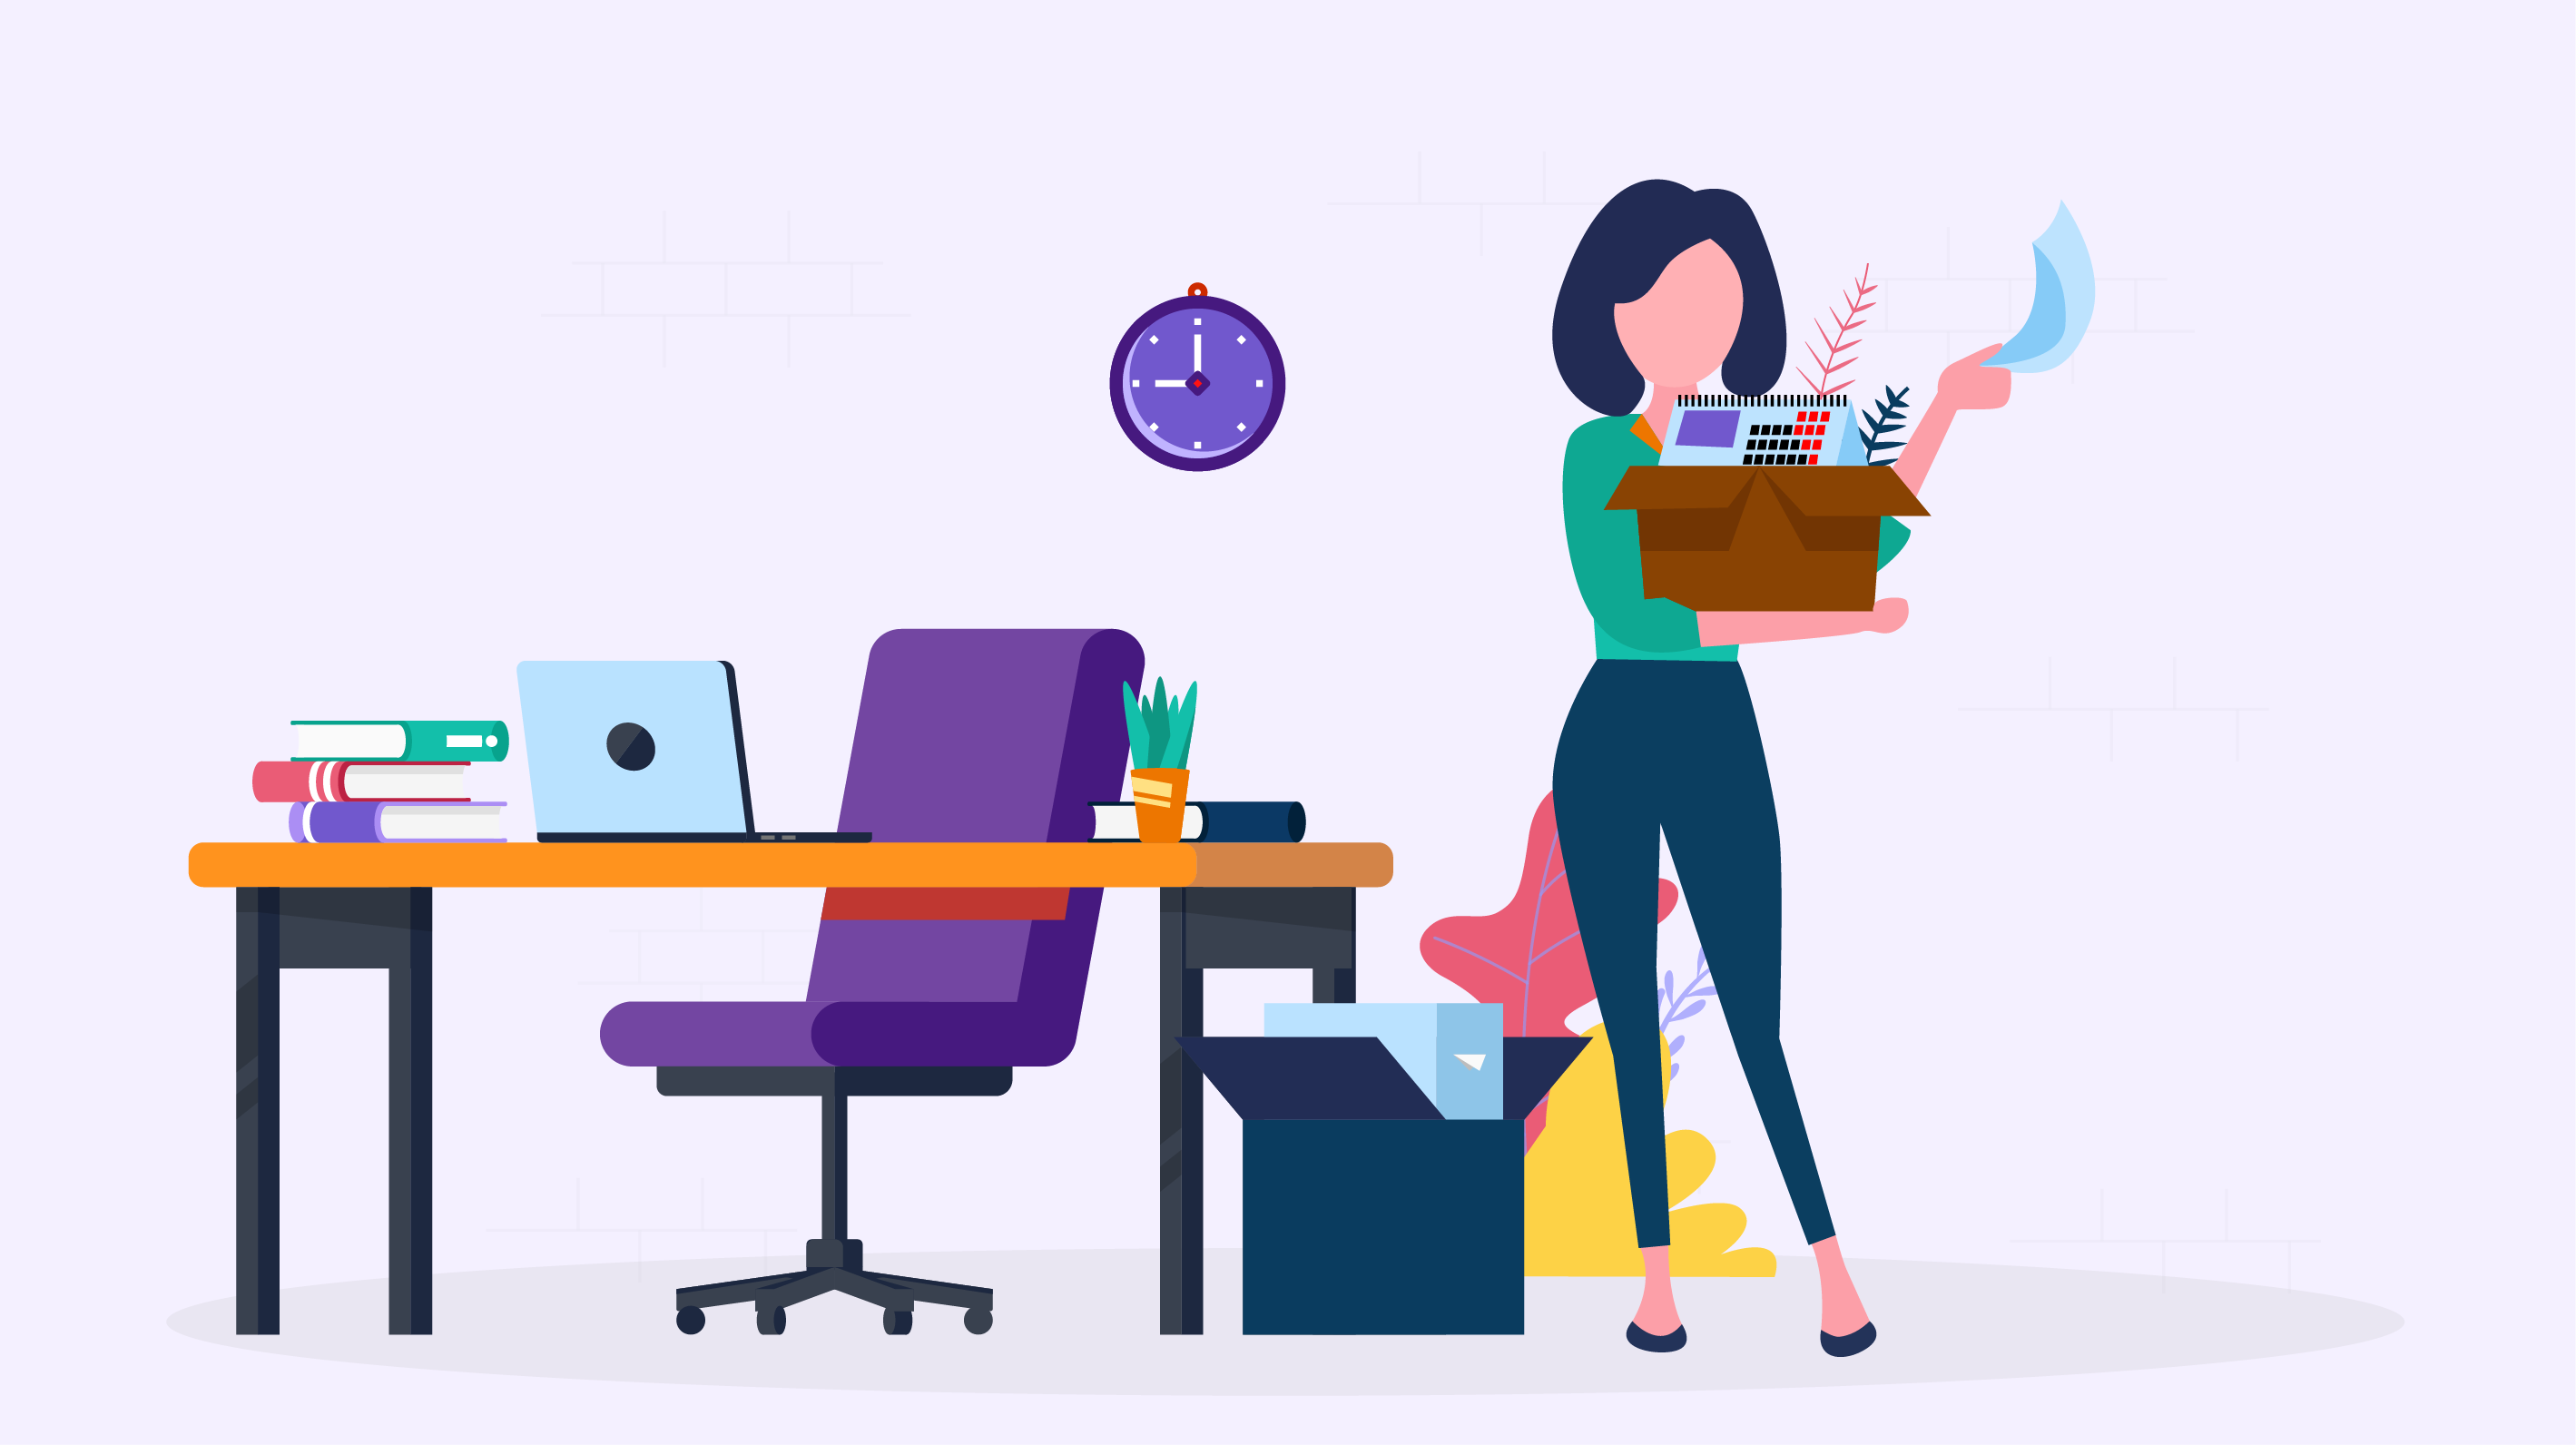

In [2]:
from IPython.display import Image
Image("Attrition.png")

## Importing Libraries

First we need to import the following libraries which we will be using in performing the Exploratory Data Analysis.

In [3]:
import pandas as pd #library used to do data analysis and data manipulation
import numpy as np #used to work with arrays
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
from scipy.stats import norm

## Loading Datasets

The following datasets are taken from Kaggle in Excel fromat which tells about the factors leading to employee retension.

In [4]:
attrition_sheet1 = pd.read_excel('IBM_Employee_Attrition_sheet1.xlsx')
attrition_sheet2 = pd.read_excel('IBM_Employee_Attrition_sheet2.xlsx')

### Merging Datasets into 1 file

As there are 2 files we need to merge them into 1 for better understanding. For this, we are going to merge the file using a column which has unique values and is common in both the sheets.

In our case, it is **Employee Number**, so let's merge files using employee id number.

In [5]:
attrition_df = pd.merge(attrition_sheet1, attrition_sheet2, on = "Employee_Number", how = "left")

***pd.merge*** is used for merging the datasets vertically and ***append()*** is used to merge horizontally.

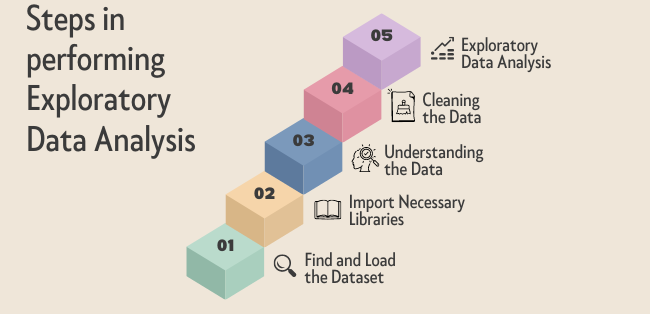

In [6]:
Image("EDA.png")

## Understanding the Dataset


For better understanding of the dataset, it's better to do the following steps:

In [7]:
attrition_df.head()

Employee_Number  Age Attrition    Business_Travel  Daily_Rate  \
0                1   41       Yes      Travel_Rarely      1102.0   
1                1   41       Yes      Travel_Rarely      1102.0   
2                2   49        No  Travel_Frequently         NaN   
3                4   37       Yes      Travel_Rarely         NaN   
4                5   33        No  Travel_Frequently         NaN   

               Department  Distance_From_Home  Education Education_Field  \
0                   Sales                   1          2   Life Sciences   
1                   Sales                   1          2   Life Sciences   
2  Research & Development                   8          1   Life Sciences   
3  Research & Development                   2          2           Other   
4  Research & Development                   3          4   Life Sciences   

   Employee_Count  ...  Relationship_Satisfaction  Standard_Hours  \
0               1  ...                          1              80   
1               1  ...                          1              80   
2               1  ...                          4              80   
3               1  ...                          2              80   
4               1  ...                          3              80   

   Stock_Option_Level  Total_Working_Years Training_Times_Last_Year  \
0                   0                    8                        0   
1                   0                    8                        0   
2                   1                   10                        3   
3                   0                    7                        3   
4                   0                    8                        3   

   Work_Life_Balance  Years_At_Company  Years_In_Current_Role  \
0                  1                 6                      4   
1                  1                 6                      4   
2                  3                10                      7   
3                  3                 0                      0   
4                  3                 8                      7   

  Years_Since_Last_Promotion  Years_With_Curr_Manager  
0                          0                        5  
1                          0                        5  
2                          1                        7  
3                          0                        0  
4                          3                        0  

[5 rows x 36 columns]

**dataset.head()** shows the first 5 rows of the data while **dataset.tail()** shows the last 5 rows by default.

If you wish to see some specific number of rows mention the row count in the bracket, eg head(20).

In [8]:
attrition_df.tail()

Employee_Number  Age Attrition Business_Travel  Daily_Rate  \
1492              183   25        No   Travel_Rarely       959.0   
1493             1999   41        No   Travel_Rarely       642.0   
1494             1999   41        No   Travel_Rarely       642.0   
1495             2007   22        No   Travel_Rarely       581.0   
1496             2007   22        No   Travel_Rarely       581.0   

                  Department  Distance_From_Home  Education Education_Field  \
1492                   Sales                  28          3   Life Sciences   
1493  Research & Development                   1          3   Life Sciences   
1494  Research & Development                   1          3   Life Sciences   
1495  Research & Development                   1          2   Life Sciences   
1496  Research & Development                   1          2   Life Sciences   

      Employee_Count  ...  Relationship_Satisfaction  Standard_Hours  \
1492               1  ...                          4              80   
1493               1  ...                          1              80   
1494               1  ...                          1              80   
1495               1  ...                          4              80   
1496               1  ...                          4              80   

      Stock_Option_Level  Total_Working_Years Training_Times_Last_Year  \
1492                   0                    6                        3   
1493                   1                   12                        3   
1494                   1                   12                        3   
1495                   0                    4                        2   
1496                   0                    4                        2   

      Work_Life_Balance  Years_At_Company  Years_In_Current_Role  \
1492                  3                 2                      2   
1493                  3                 5                      3   
1494                  3                 5                      3   
1495                  4                 3                      2   
1496                  4                 3                      2   

     Years_Since_Last_Promotion  Years_With_Curr_Manager  
1492                          2                        2  
1493                          1                        0  
1494                          1                        0  
1495                          1                        2  
1496                          1                        2  

[5 rows x 36 columns]

In [9]:
attrition_df.shape

(1497, 36)

**dataset.shape** tells about the total number of rows and columns in a dataset.

In the uploaded dataset, there are 1497 rows and 36 columns.

**dataset.info** will help in knowing the datatype of the columns, it also help to know if there is any null values in the dataset.

As we can see below ***Daily_Rate*** has 452 non-null rows and ***Over_Time*** have 1186 non-null rows while the total rows of the dataset is 1497, so we can interpret that there are 1045 null values in the ***Daily_Rate*** column and 452 null values in the ***Over_Time*** column.

In [10]:
#Checking the data type and non-null values of dataset

print(attrition_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 1496
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Number             1497 non-null   int64  
 1   Age                         1497 non-null   int64  
 2   Attrition                   1497 non-null   object 
 3   Business_Travel             1497 non-null   object 
 4   Daily_Rate                  452 non-null    float64
 5   Department                  1497 non-null   object 
 6   Distance_From_Home          1497 non-null   int64  
 7   Education                   1497 non-null   int64  
 8   Education_Field             1497 non-null   object 
 9   Employee_Count              1497 non-null   int64  
 10  Environment_Satisfaction    1497 non-null   int64  
 11  Hourly_Rate_x               1497 non-null   int64  
 12  Monthly_Income              1497 non-null   int64  
 13  Monthly_Rate                1497 

In [11]:
attrition_df.columns

Index(['Employee_Number', 'Age', 'Attrition', 'Business_Travel', 'Daily_Rate',
       'Department', 'Distance_From_Home', 'Education', 'Education_Field',
       'Employee_Count', 'Environment_Satisfaction', 'Hourly_Rate_x',
       'Monthly_Income', 'Monthly_Rate', 'Gender', 'Hourly_Rate_y',
       'Job_Involvement', 'Job_Level', 'Job_Role', 'Job_Satisfaction',
       'Marital_Status', 'Num_Companies_Worked', 'Over_18', 'Over_Time',
       'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Standard_Hours', 'Stock_Option_Level',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Curr_Manager'],
      dtype='object')

**dataset.columns** will mention all the column names available in the dataset, this way we can see the columns that were hidden in between the columns due to space.


**dataset.nunique** will help us know the unique values in each column.

In [12]:
attrition_df.nunique()

Employee_Number               1470
Age                             43
Attrition                        2
Business_Travel                  3
Daily_Rate                     365
Department                       3
Distance_From_Home              29
Education                        5
Education_Field                  6
Employee_Count                   1
Environment_Satisfaction         4
Hourly_Rate_x                   71
Monthly_Income                1349
Monthly_Rate                  1427
Gender                           2
Hourly_Rate_y                   71
Job_Involvement                  4
Job_Level                        5
Job_Role                         9
Job_Satisfaction                 4
Marital_Status                   3
Num_Companies_Worked            10
Over_18                          1
Over_Time                        2
Percent_Salary_Hike             15
Performance_Rating               2
Relationship_Satisfaction        4
Standard_Hours                   1
Stock_Option_Level  

**dataset.describe()** will tell about some important metrics of each column, like - count of values, mean, standard deviation, minimum value, maximum value, percentiles.

Please note, that this function ignores the categorical columns, so not all columns will be represented in this table.

In [13]:
attrition_df.describe()

Employee_Number          Age   Daily_Rate  Distance_From_Home  \
count      1497.000000  1497.000000   452.000000         1497.000000   
mean       1015.511022    36.843019   821.984513            9.201069   
std         610.169035     9.219983   392.710641            8.179082   
min           1.000000    18.000000   103.000000            1.000000   
25%         474.000000    30.000000   526.000000            2.000000   
50%        1012.000000    36.000000   823.000000            7.000000   
75%        1555.000000    43.000000  1169.000000           14.000000   
max        2068.000000    60.000000  1499.000000           29.000000   

         Education  Employee_Count  Environment_Satisfaction  Hourly_Rate_x  \
count  1497.000000          1497.0               1497.000000    1497.000000   
mean      2.898464             1.0                  2.722779      65.983300   
std       1.027225             0.0                  1.093843      20.373822   
min       1.000000             1.0                  1.000000      30.000000   
25%       2.000000             1.0                  2.000000      48.000000   
50%       3.000000             1.0                  3.000000      66.000000   
75%       4.000000             1.0                  4.000000      84.000000   
max       5.000000             1.0                  4.000000     100.000000   

       Monthly_Income  Monthly_Rate  ...  Relationship_Satisfaction  \
count     1497.000000   1497.000000  ...                1497.000000   
mean      6458.513694  14400.927188  ...                   2.711423   
std       4685.035517   7110.687973  ...                   1.086295   
min       1009.000000   2094.000000  ...                   1.000000   
25%       2897.000000   8232.000000  ...                   2.000000   
50%       4898.000000  14399.000000  ...                   3.000000   
75%       8268.000000  20471.000000  ...                   4.000000   
max      19999.000000  26999.000000  ...                   4.000000   

       Standard_Hours  Stock_Option_Level  Total_Working_Years  \
count          1497.0         1497.000000          1497.000000   
mean             80.0            0.795591            11.212425   
std               0.0            0.854936             7.755214   
min              80.0            0.000000             0.000000   
25%              80.0            0.000000             6.000000   
50%              80.0            1.000000            10.000000   
75%              80.0            1.000000            15.000000   
max              80.0            3.000000            40.000000   

       Training_Times_Last_Year  Work_Life_Balance  Years_At_Company  \
count               1497.000000        1497.000000       1497.000000   
mean                   2.790915           2.757515          6.937876   
std                    1.285344           0.709456          6.100497   
min                    0.000000           1.000000          0.000000   
25%                    2.000000           2.000000          3.000000   
50%                    3.000000           3.000000          5.000000   
75%                    3.000000           3.000000          9.000000   
max                    6.000000           4.000000         40.000000   

       Years_In_Current_Role  Years_Since_Last_Promotion  \
count            1497.000000                 1497.000000   
mean                4.195057                    2.178357   
std                 3.609724                    3.205879   
min                 0.000000                    0.000000   
25%                 2.000000                    0.000000   
50%                 3.000000                    1.000000   
75%                 7.000000                    3.000000   
max                18.000000                   15.000000   

       Years_With_Curr_Manager  
count              1497.000000  
mean                  4.086840  
std                   3.559155  
min                   0.000000  
25%                   2.000000  
50%                   3

## Data Cleaning

Once we have understood the data, it is required to take a few steps to make sure we don't do our analysis on a poor data. 

Following are the major data cleaning steps that improves the data quality and makes it fit for analysis.

- Remove null values
- Check for duplicate rows and delete 1 of the duplicated entry
- Change the data to correct format
- Detect and Remove outliers

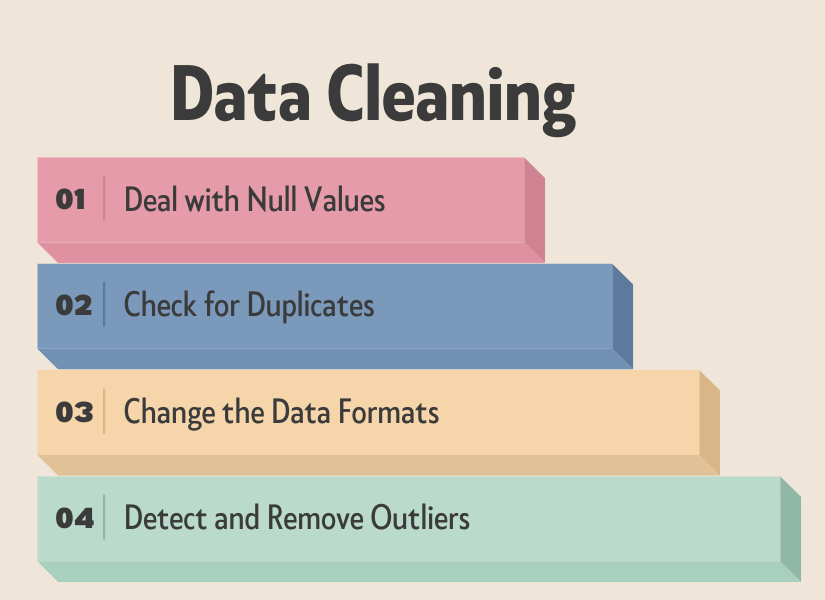

In [14]:
Image("Data Cleaning.png")

### Step 1 - Dealing with Null Values

There are 2 ways to deal with null values:
- remove them completely
- substitute with them with a relevant number

Although we got an idea of null values from the **info()** as well, but **isnull().sum()** is more common way to look for null values.

In this case, we will be using **heatmap**, which is gonna show null values using yellow lines for the column that have null values.

There are other common visualisation ways as well to show missing values:  
- Bar Charts
- Matrix Plot

<AxesSubplot:>

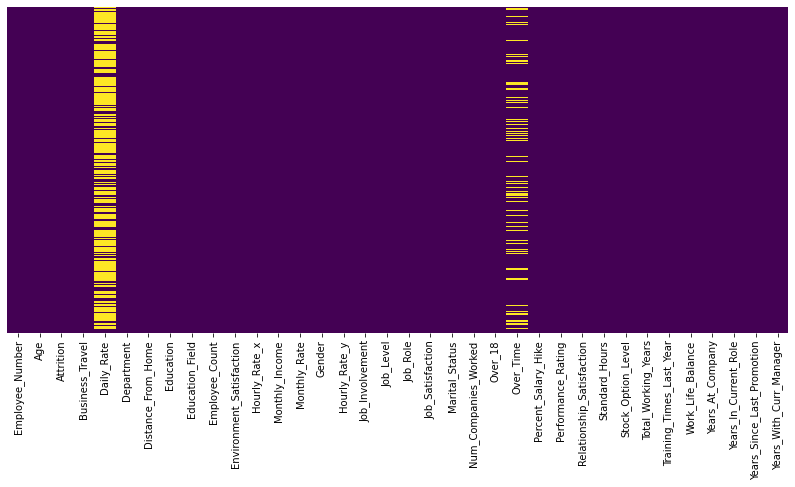

In [15]:
plt.figure(figsize = (14, 6))
sns.heatmap(attrition_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

It is better to check the percentage of missing values to the total row before reaching to any conclusion whether to remove the entire column or replace the values.

In [16]:
percent_missing = attrition_df.isnull().sum() * 100 / len(attrition_df)
percent_missing

Employee_Number                0.000000
Age                            0.000000
Attrition                      0.000000
Business_Travel                0.000000
Daily_Rate                    69.806279
Department                     0.000000
Distance_From_Home             0.000000
Education                      0.000000
Education_Field                0.000000
Employee_Count                 0.000000
Environment_Satisfaction       0.000000
Hourly_Rate_x                  0.000000
Monthly_Income                 0.000000
Monthly_Rate                   0.000000
Gender                         0.000000
Hourly_Rate_y                  0.000000
Job_Involvement                0.000000
Job_Level                      0.000000
Job_Role                       0.000000
Job_Satisfaction               0.000000
Marital_Status                 0.000000
Num_Companies_Worked           0.000000
Over_18                        0.000000
Over_Time                     20.774883
Percent_Salary_Hike            0.000000


From above, it can be seen percentage of null values is 69% for **Daily_Rate** so it's better to remove the entire column, while for **Over_Time** which has 21% null values, we can replace the null values with another value.

From above **nunique()**, we can see there are just 2 unique values in Over Time column, so lets remove it with the mode.

Depending upon the data and column category, we can decide with what we want to replace the null values, some common replacements of null value are - ***mean***, ***median*** and ***mode*** depending upon the problem situation.

In [17]:
attrition_df.drop(["Daily_Rate"], axis = 1, inplace = True)

In [18]:
attrition_df['Over_Time'].mode()[0]

attrition_df['Over_Time'] = attrition_df['Over_Time'].fillna(attrition_df['Over_Time'].mode()[0])

### Step 2 - Checking for Duplicates

If the 2 rows are having same value for each feature, it will be considered as a duplicate row and it is better to remove 1 duplicate row for better data analysis.

In [19]:
print(attrition_df.duplicated())

0       False
1        True
2       False
3       False
4       False
        ...  
1492     True
1493     True
1494     True
1495     True
1496     True
Length: 1497, dtype: bool


As the data set is big, there is a possiblity that we have missed duplicate rows in the middle data, so let's check the count of duplicate values.

In [20]:
attrition_df.duplicated().sum()

27

In [21]:
attrition_df[attrition_df["Employee_Number"].duplicated()].head(30) 

Employee_Number  Age Attrition Business_Travel              Department  \
1                   1   41       Yes   Travel_Rarely                   Sales   
6                   7   27        No   Travel_Rarely  Research & Development   
9                  10   59        No   Travel_Rarely  Research & Development   
13                 13   36        No   Travel_Rarely  Research & Development   
132               167   19       Yes   Travel_Rarely                   Sales   
134               169   22        No   Travel_Rarely  Research & Development   
145               183   25        No   Travel_Rarely                   Sales   
1428             1999   41        No   Travel_Rarely  Research & Development   
1432             2007   22        No   Travel_Rarely  Research & Development   
1479                1   41       Yes   Travel_Rarely                   Sales   
1480                1   41       Yes   Travel_Rarely                   Sales   
1481                7   27        No   Travel_Rarely  Research & Development   
1482                7   27        No   Travel_Rarely  Research & Development   
1483               10   59        No   Travel_Rarely  Research & Development   
1484               10   59        No   Travel_Rarely  Research & Development   
1485               13   36        No   Travel_Rarely  Research & Development   
1486               13   36        No   Travel_Rarely  Research & Development   
1487              167   19       Yes   Travel_Rarely                   Sales   
1488              167   19       Yes   Travel_Rarely                   Sales   
1489              169   22        No   Travel_Rarely  Research & Development   
1490              169   22        No   Travel_Rarely  Research & Development   
1491              183   25        No   Travel_Rarely                   Sales   
1492              183   25        No   Travel_Rarely                   Sales   
1493             1999   41        No   Travel_Rarely  Research & Development   
1494             1999   41        No   Travel_Rarely  Research & Development   
1495             2007   22        No   Travel_Rarely  Research & Development   
1496             2007   22        No   Travel_Rarely  Research & Development   

      Distance_From_Home  Education   Education_Field  Employee_Count  \
1                      1          2     Life Sciences               1   
6                      2          1           Medical               1   
9                      3          3           Medical               1   
13                    27          3           Medical               1   
132                   22          1         Marketing               1   
134                    2          1  Technical Degree               1   
145                   28          3     Life Sciences               1   
1428                   1          3     Life Sciences               1   
1432                   1          2     Life Sciences               1   
1479                   1          2     Life Sciences               1   
1480                   1          2     Life Sciences               1   
1481                   2          1           Medical               1   
1482                   2          1           Medical               1   
1483                   3          3           Medical               1   
1484                   3          3           Medical               1   
1485                  27          3           Medical               1   
1486                  27          3           Medical               1   
1487                  22          1         Marketing               1   
1488                  22          1         Marketing               1   
1489                   2          1  Technical Degree               1   
1490                   2          1  Technical Degree               1   
1491                  28          3     Life Sciences               1   
1492                  28          3     Life Sciences               1   
1493         

Now as we know, there are 27 duplicated values in the dataset and we have seen the rows as well. It's better to drop 1 of the duplicated row.

In this case, we are keeping the first duplicate entry and are dropping the second duplicate row.

In [22]:
attrition_df.drop_duplicates(keep = "first", inplace = True)

### Step 3 - Dropping Irrelevant Columns

To avoid confusion, it is better to remove the columns that are unnecessary and are not showing important factors which will help us to reach the conclusion of employee attrition.

In [23]:
attrition_df.drop(["Employee_Count", "Monthly_Rate", "Hourly_Rate_x", "Hourly_Rate_y", "Over_18", "Standard_Hours"], axis = 1, inplace = True)

### Step - 4 Outlier Detection

Outiers are rare values in the dataset that are different from mojority of the values, it is better to remove them as they are deviate from the normal behavious and there is a chance that these values are incorrect.

There are 4 common ways of finding outliers

- Quantile
- Using Mean and standard Deviation
- Z-Score (similar to the previous one)
- IQR
- Scatter Plot
- Box Plot
- Normal Distribution and Bell Curve

For this case, we will be using different ways to know if there are any outliers in the data.

**Columns To be Considered** - We will check for outliers in the following columns as they are having numerical data and the number of unique values in these columns is also more than 15, so there is a chance we miss the outlier in between the data:

- Monthly Income (using Quantile)
- Years At Company (using Quantile)
- Years In Current Role (Using Mean and Standard Deviation)
- Years With Current Manager (Using IQR)
- Years Since Last Promotion (Using Normal Distribution)
- Number Companies Worked (Using Boxplot)

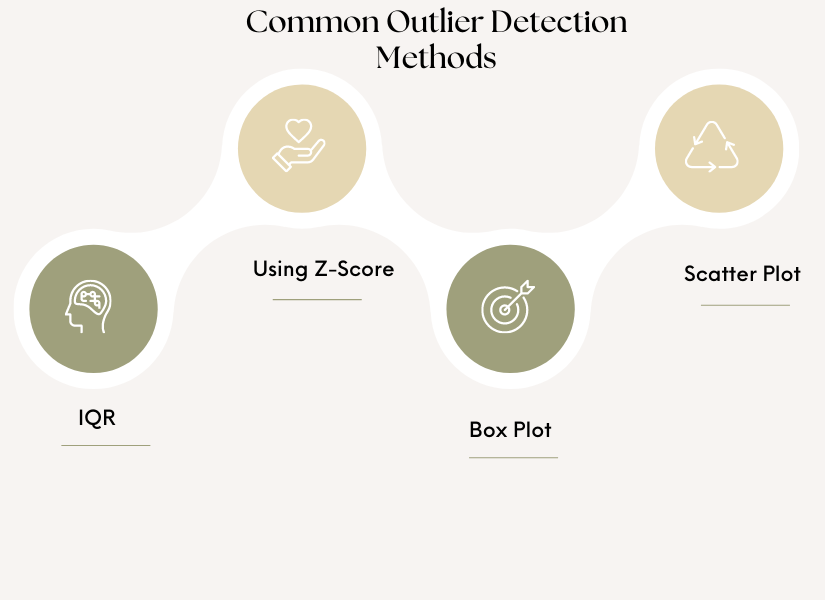

In [24]:
Image("Outlier.png")

#### Type 1 - Using Quantile

First we will try to detect and remove the outliers from the **Monthly Income** column using the quantile method.

We can set a minimum and maximum threshold and then we can exclude the data values that fall outside this threshold from our data.

In [25]:
min_threshold = attrition_df["Monthly_Income"].quantile(0.001)
attrition_df[attrition_df["Monthly_Income"]<min_threshold]

Employee_Number  Age Attrition Business_Travel              Department  \
520              701   20       Yes   Travel_Rarely  Research & Development   
734             1012   18        No      Non-Travel  Research & Development   

     Distance_From_Home  Education Education_Field  Environment_Satisfaction  \
520                  10          1         Medical                         4   
734                   5          2   Life Sciences                         2   

     Monthly_Income  ... Performance_Rating  Relationship_Satisfaction  \
520            1009  ...                  3                          4   
734            1051  ...                  3                          4   

     Stock_Option_Level Total_Working_Years  Training_Times_Last_Year  \
520                   0                   1                         5   
734                   0                   0                         2   

    Work_Life_Balance  Years_At_Company Years_In_Current_Role  \
520                 3                 1                     0   
734                 3                 0                     0   

     Years_Since_Last_Promotion  Years_With_Curr_Manager  
520                           1                        1  
734                           0                        0  

[2 rows x 29 columns]

In [26]:
max_threshold = attrition_df["Monthly_Income"].quantile(0.999)
attrition_df[attrition_df["Monthly_Income"]>max_threshold]

Employee_Number  Age Attrition Business_Travel              Department  \
197              259   52        No   Travel_Rarely  Research & Development   
753             1035   41        No      Non-Travel  Research & Development   

     Distance_From_Home  Education Education_Field  Environment_Satisfaction  \
197                   1          4   Life Sciences                         3   
753                   7          1   Life Sciences                         2   

     Monthly_Income  ... Performance_Rating  Relationship_Satisfaction  \
197           19999  ...                  3                          1   
753           19973  ...                  4                          2   

     Stock_Option_Level Total_Working_Years  Training_Times_Last_Year  \
197                   1                  34                         5   
753                   2                  21                         3   

    Work_Life_Balance  Years_At_Company Years_In_Current_Role  \
197                 3                33                    18   
753                 3                21                    16   

     Years_Since_Last_Promotion  Years_With_Curr_Manager  
197                          11                        9  
753                           5                       10  

[2 rows x 29 columns]

In [27]:
attrition_df = attrition_df[(attrition_df["Monthly_Income"] < max_threshold) & (attrition_df["Monthly_Income"]>min_threshold)]
attrition_df.shape

(1466, 29)

From above, we can see that there were 2 outliers which were below our minimum threshold and 2 which were above our maximum threshold. We have removed these 4 rows in our data and now we are left with 1466 rows.


Now let's use the same method to detect and remove outliers from **Years At Company** column.

In [28]:
min_threshold = attrition_df["Years_At_Company"].quantile(0.001)
attrition_df[attrition_df["Years_At_Company"]<min_threshold]

Empty DataFrame
Columns: [Employee_Number, Age, Attrition, Business_Travel, Department, Distance_From_Home, Education, Education_Field, Environment_Satisfaction, Monthly_Income, Gender, Job_Involvement, Job_Level, Job_Role, Job_Satisfaction, Marital_Status, Num_Companies_Worked, Over_Time, Percent_Salary_Hike, Performance_Rating, Relationship_Satisfaction, Stock_Option_Level, Total_Working_Years, Training_Times_Last_Year, Work_Life_Balance, Years_At_Company, Years_In_Current_Role, Years_Since_Last_Promotion, Years_With_Curr_Manager]
Index: []

[0 rows x 29 columns]

In [29]:
max_threshold = attrition_df["Years_At_Company"].quantile(0.999)
attrition_df[attrition_df["Years_At_Company"]>max_threshold]

Employee_Number  Age Attrition Business_Travel              Department  \
102              131   58        No   Travel_Rarely                   Sales   
130              165   58       Yes   Travel_Rarely  Research & Development   

     Distance_From_Home  Education Education_Field  Environment_Satisfaction  \
102                  10          4         Medical                         4   
130                  23          4         Medical                         4   

     Monthly_Income  ... Performance_Rating  Relationship_Satisfaction  \
102           13872  ...                  3                          3   
130           10312  ...                  3                          4   

     Stock_Option_Level Total_Working_Years  Training_Times_Last_Year  \
102                   0                  38                         1   
130                   1                  40                         3   

    Work_Life_Balance  Years_At_Company Years_In_Current_Role  \
102                 2                37                    10   
130                 2                40                    10   

     Years_Since_Last_Promotion  Years_With_Curr_Manager  
102                           1                        8  
130                          15                        6  

[2 rows x 29 columns]

In [30]:
attrition_df = attrition_df[(attrition_df["Years_At_Company"] < max_threshold) & (attrition_df["Years_At_Company"]>min_threshold)]
attrition_df.shape

(1421, 29)

#### Step 2 Using Mean and Standard Deviation

Outliers can be detected using mean and standard deviation.

For this we need to set upper and lower limit using the mean and standard deviation of a column, and then we can exclude the terms that are outside this bracket

***Mean*** - It is the average value of the data and can be easily found by adding all the values and dividing the sum with the number of term.

***Standard Deviation (std)*** - It is useful to know the distribution of the data, if the std is high, it means that the values are scatters and are far away from the mean while the low std shows the data is clustered and is around the mean only.

Lets use this way to detect and remove outliers of **Years In Current Role** column.

In [31]:
upper_limit = attrition_df.Years_In_Current_Role.mean() + 3*attrition_df.Years_In_Current_Role.std()
upper_limit

15.038140207199362

In [32]:
lower_limit = attrition_df.Years_In_Current_Role.mean() - 3*attrition_df.Years_In_Current_Role.std()
lower_limit

-6.363967089676492

In [33]:
attrition_df[(attrition_df.Years_In_Current_Role > upper_limit) | (attrition_df.Years_In_Current_Role < lower_limit)]

Employee_Number  Age Attrition    Business_Travel  \
67                 81   59        No      Travel_Rarely   
127               162   51        No      Travel_Rarely   
238               319   42        No      Travel_Rarely   
288               387   42        No      Travel_Rarely   
473               625   41        No      Travel_Rarely   
723               999   41        No  Travel_Frequently   
983              1373   56        No      Travel_Rarely   
1031             1443   47        No      Travel_Rarely   
1334             1863   46        No      Travel_Rarely   
1358             1900   48        No  Travel_Frequently   
1439             2015   38        No      Travel_Rarely   

                  Department  Distance_From_Home  Education   Education_Field  \
67                     Sales                  25          3     Life Sciences   
127   Research & Development                   6          3     Life Sciences   
238   Research & Development                   4          2  Technical Degree   
288                    Sales                   1          1     Life Sciences   
473                    Sales                   2          5     Life Sciences   
723   Research & Development                   9          3           Medical   
983   Research & Development                  23          3     Life Sciences   
1031  Research & Development                   2          4           Medical   
1334                   Sales                   3          3  Technical Degree   
1358  Research & Development                  22          3           Medical   
1439  Research & Development                  10          3           Medical   

      Environment_Satisfaction  Monthly_Income  ... Performance_Rating  \
67                           1            7637  ...                  3   
127                          1           19537  ...                  3   
238                          3           19232  ...                  3   
288                          2            4907  ...                  4   
473                          2           16595  ...                  3   
723                          1           19419  ...                  3   
983                          4           13402  ...                  3   
1031                         1           17169  ...                  3   
1334                         1           13225  ...                  3   
1358                         4           17174  ...                  3   
1439                         2           13206  ...                  3   

      Relationship_Satisfaction  Stock_Option_Level Total_Working_Years  \
67                            4                   0                  28   
127                           3                   0                  23   
238                           4                   0                  22   
288                           3                   0                  20   
473                           2                   1                  22   
723                           2                   1                  21   
983                           1                   1                  33   
1031                          2                   2                  26   
1334                          4                   1                  25   
1358                          2                   1                  24   
1439                          1                   1                  20   

      Training_Times_Last_Year Work_Life_Balance  Years_At_Company  \
67                           3                 2                21   
127                          5                 3                20   
238                          3                 3                22   
288                          3                 3                20   
473                          2                 3                18   
723                          2                 4                18   
983                          0              

In [34]:
attrition_df = attrition_df[(attrition_df["Years_In_Current_Role"] < upper_limit) & (attrition_df["Years_In_Current_Role"] > lower_limit)]
attrition_df.shape

(1410, 29)

#### Type 3 - Using IQR

IQR is similar to quantile method, but here we find quantile of quarter 1 (25%) and quarter 3 (75%), and after finding a difference between these 2 calculated terms, we find a difference between the values and use that for setting the upper and lower limit.

Then like above methods, we can exclude these values from the data.

We are going to use this method for **Years With Current Manager** method.

In [35]:
Q1 = attrition_df.Years_With_Curr_Manager.quantile(0.25)
Q3 = attrition_df.Years_With_Curr_Manager.quantile(0.75)
Q1, Q3

(2.0, 7.0)

In [36]:
IQR = Q3 - Q1
IQR

5.0

In [37]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-5.5, 14.5)

In [38]:
attrition_df[(attrition_df.Years_With_Curr_Manager < lower_limit) | (attrition_df.Years_With_Curr_Manager > upper_limit)]

Employee_Number  Age Attrition Business_Travel              Department  \
32                 36   44        No   Travel_Rarely  Research & Development   
160               206   45        No   Travel_Rarely  Research & Development   
194               254   55        No   Travel_Rarely  Research & Development   
393               515   37        No   Travel_Rarely  Research & Development   
568               776   52        No   Travel_Rarely                   Sales   
623               851   51        No   Travel_Rarely                   Sales   
642               880   35        No   Travel_Rarely  Research & Development   
693               957   41        No   Travel_Rarely  Research & Development   
882              1225   44        No   Travel_Rarely  Research & Development   
933              1293   43        No   Travel_Rarely                   Sales   
1085             1523   44        No   Travel_Rarely  Research & Development   
1355             1892   40        No   Travel_Rarely  Research & Development   

      Distance_From_Home  Education Education_Field  Environment_Satisfaction  \
32                     7          4         Medical                         1   
160                    9          3   Life Sciences                         2   
194                   14          4         Medical                         3   
393                   14          3   Life Sciences                         4   
568                    3          4       Marketing                         3   
623                   26          4       Marketing                         1   
642                    9          3   Life Sciences                         4   
693                    6          3         Medical                         4   
882                   29          4           Other                         4   
933                    4          4       Marketing                         4   
1085                  28          3   Life Sciences                         4   
1355                   1          4   Life Sciences                         1   

      Monthly_Income  ... Performance_Rating  Relationship_Satisfaction  \
32             10248  ...                  3                          4   
160             2348  ...                  3                          3   
194            18722  ...                  3                          4   
393             3034  ...                  3                          3   
568            16856  ...                  3                          1   
623            16307  ...                  3                          3   
642            10685  ...                  4                          2   
693             4721  ...                  3                          3   
882             4541  ...                  4                          2   
933            10231  ...                  3                          4   
1085           16328  ...                  3                          3   
1355           16823  ...                  3                          1   

      Stock_Option_Level Total_Working_Years  Training_Times_Last_Year  \
32                     1                  24                         4   
160                    1                  20                         2   
194                    0                  36                         3   
393                    1                  18                         2   
568                    0                  34                         3   
623                    1                  29                         2   
642                    1                  17                         2   
693                    0                  20                         3   
882                    0                  20                         3   
933                    0                  23                         3   
1085                   1                  24                         1   
1355                   1                  22   

In [39]:
attrition_df = attrition_df[(attrition_df["Years_With_Curr_Manager"] < upper_limit) & (attrition_df["Years_With_Curr_Manager"] > lower_limit)]
attrition_df.shape

(1398, 29)

#### Type 4 - Using Normal Distribution

Instead of finding outliers, we can also visualize them.

There are many visual ways to detect a outlier but for the column **Years Since Last Promotion** we are using a Histogram and a bell curve, it can help us know the distribution of the data and if the trend doesnt seem normal, we can say that the outliers are present.

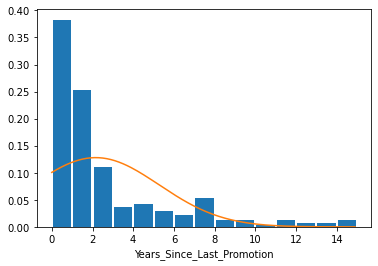

In [40]:
plt.hist(attrition_df.Years_Since_Last_Promotion, bins = 15, rwidth = 0.9, density = True)
plt.xlabel("Years_Since_Last_Promotion")

rng = np.arange(attrition_df.Years_Since_Last_Promotion.min(), attrition_df.Years_Since_Last_Promotion.max(), 0.1)
plt.plot(rng, norm.pdf(rng, attrition_df.Years_Since_Last_Promotion.mean(), attrition_df.Years_Since_Last_Promotion.std()))

#### Type 5 - Boxplot

Boxplot is another visual way like Normal Distribution to detect an outlier.

A box plot is divided into different parts, starting from minimum point, then comes whisker that covers 25% of quartile, after that comes 2nd quartile, then median, third quartile, 2nd whisker area showing the remaining 25% of the quartile. The point where the whisker end is known as maximum point, any point outside this range of minimum and maximum point will be considered as an **Outlier**.

<AxesSubplot:xlabel='Num_Companies_Worked'>

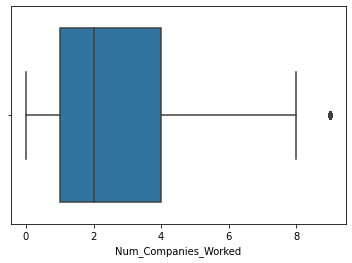

In [41]:
sns.boxplot(data = attrition_df, x = "Num_Companies_Worked")

## Relationship Analysis

It helps us to know the best set of features to explain a relationship between two variables.

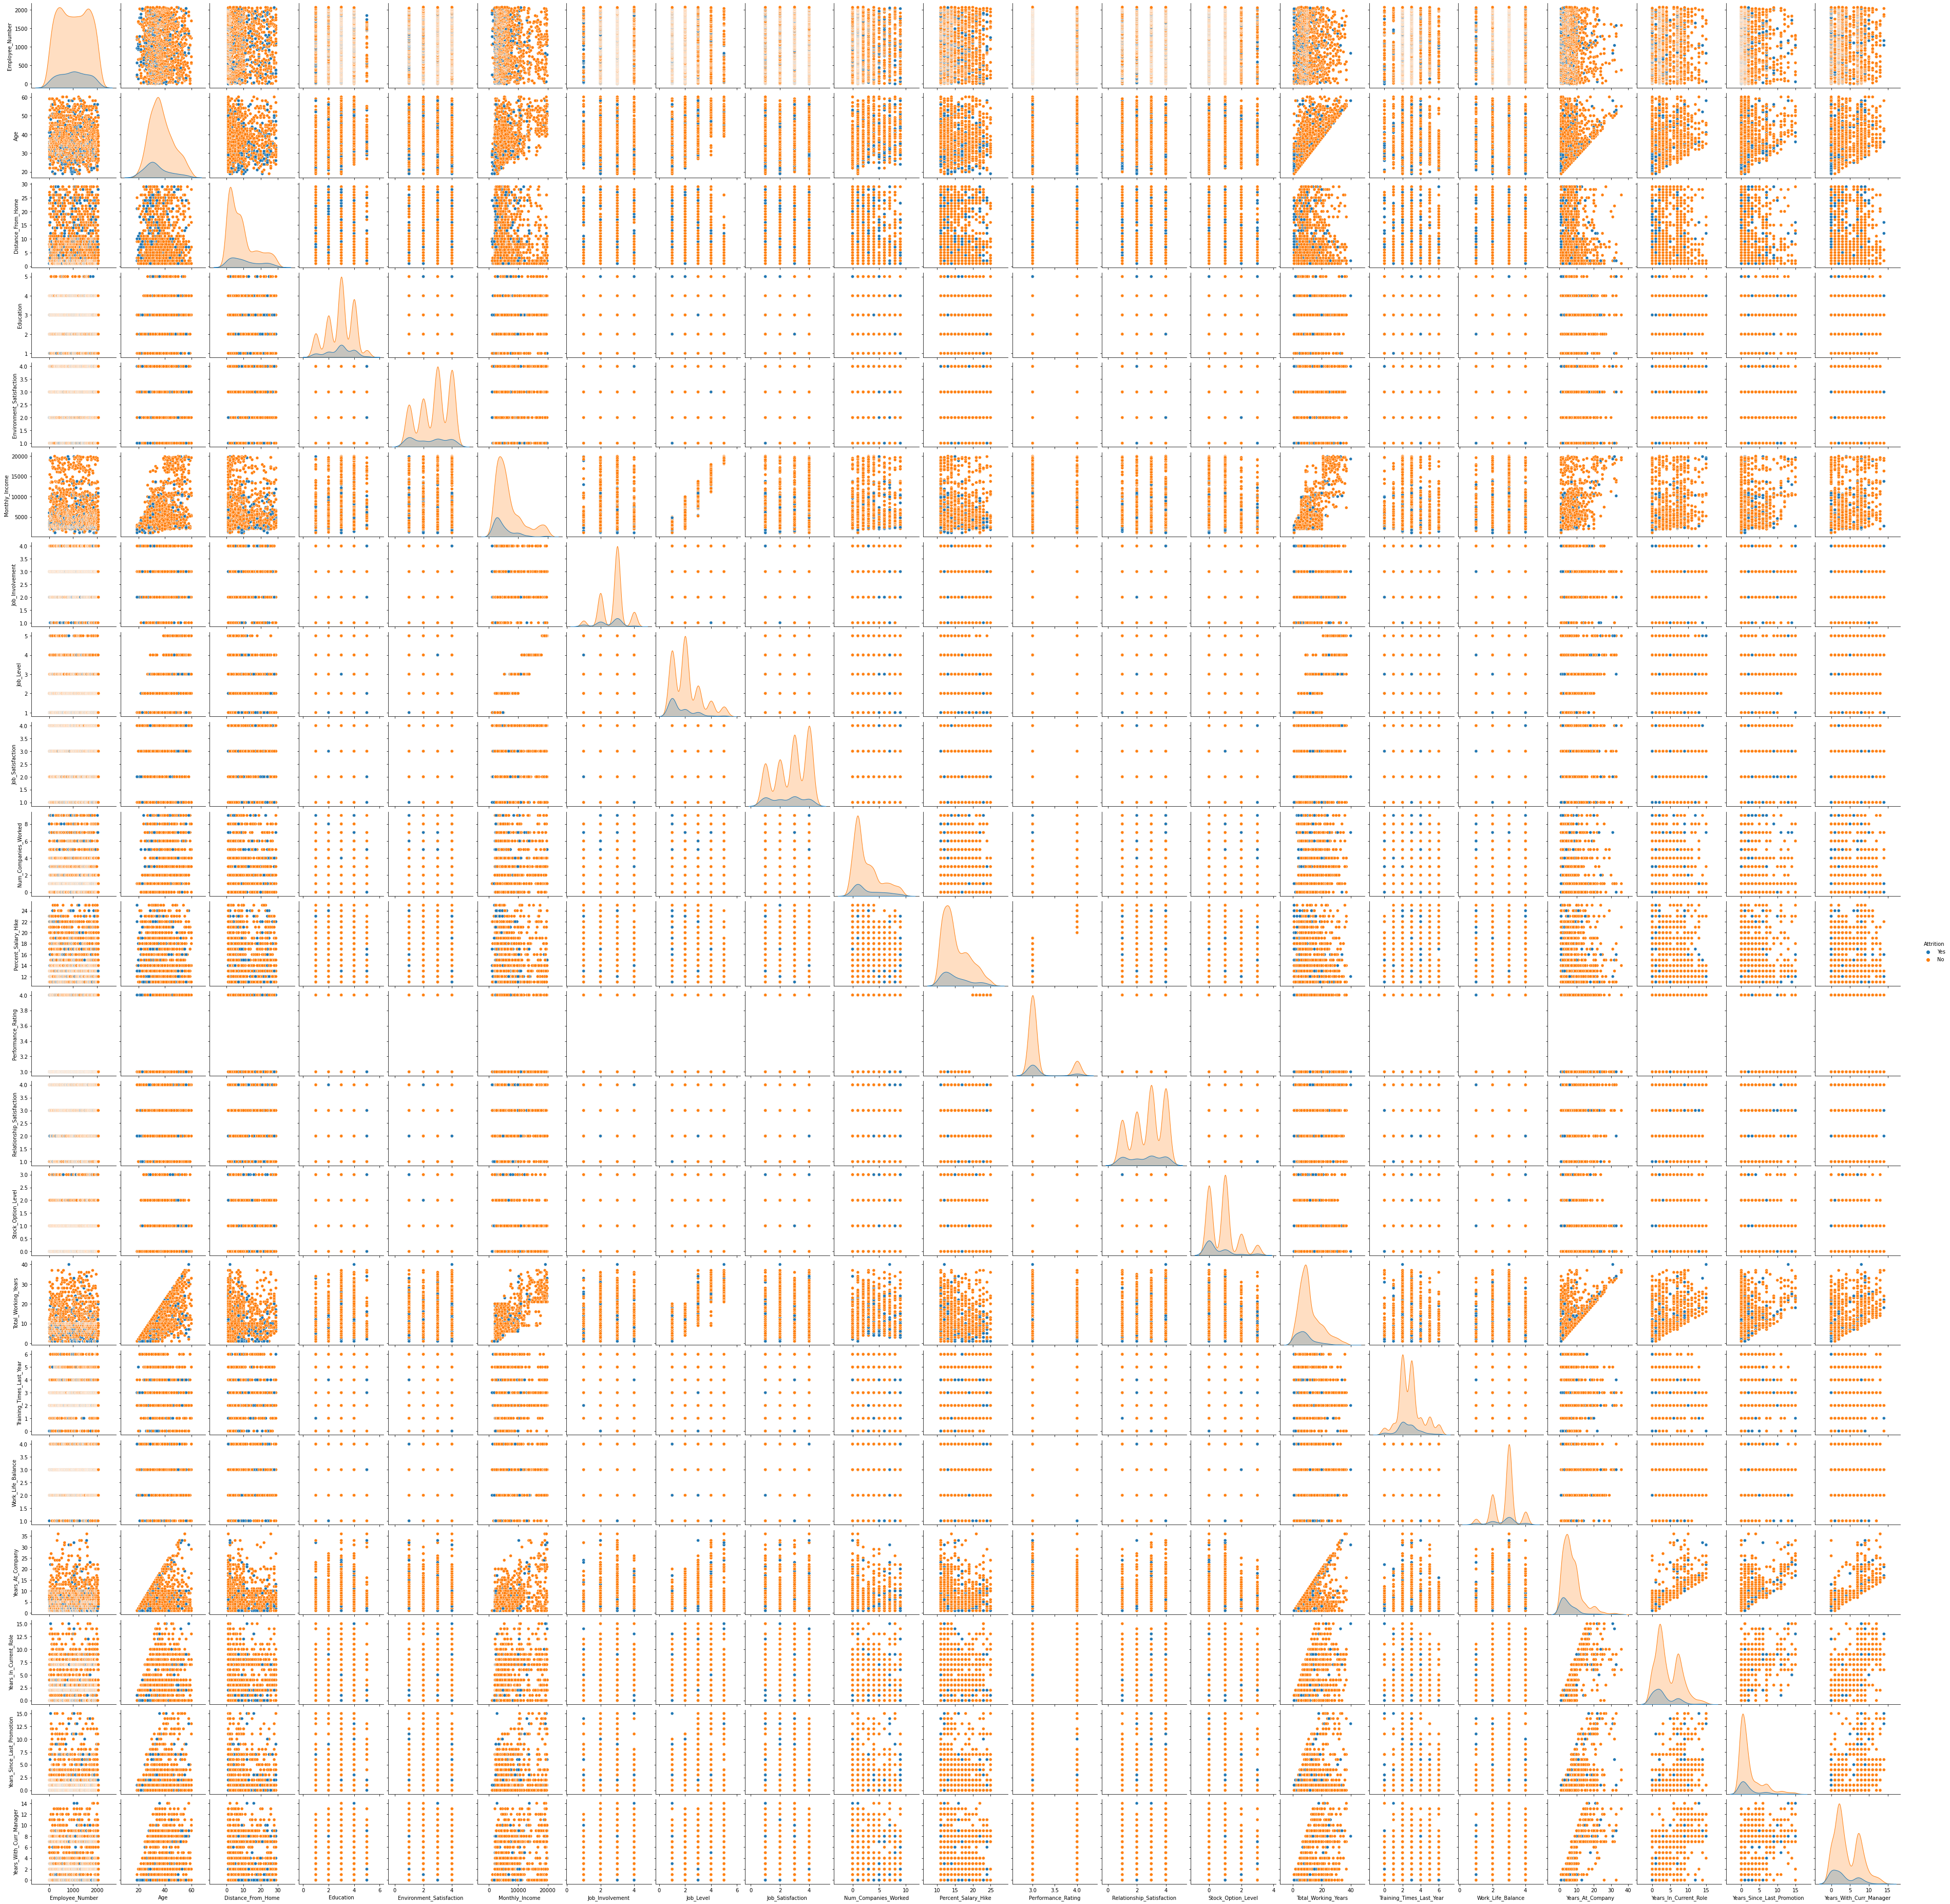

In [42]:
sns.pairplot(attrition_df, hue = "Attrition")

<AxesSubplot:>

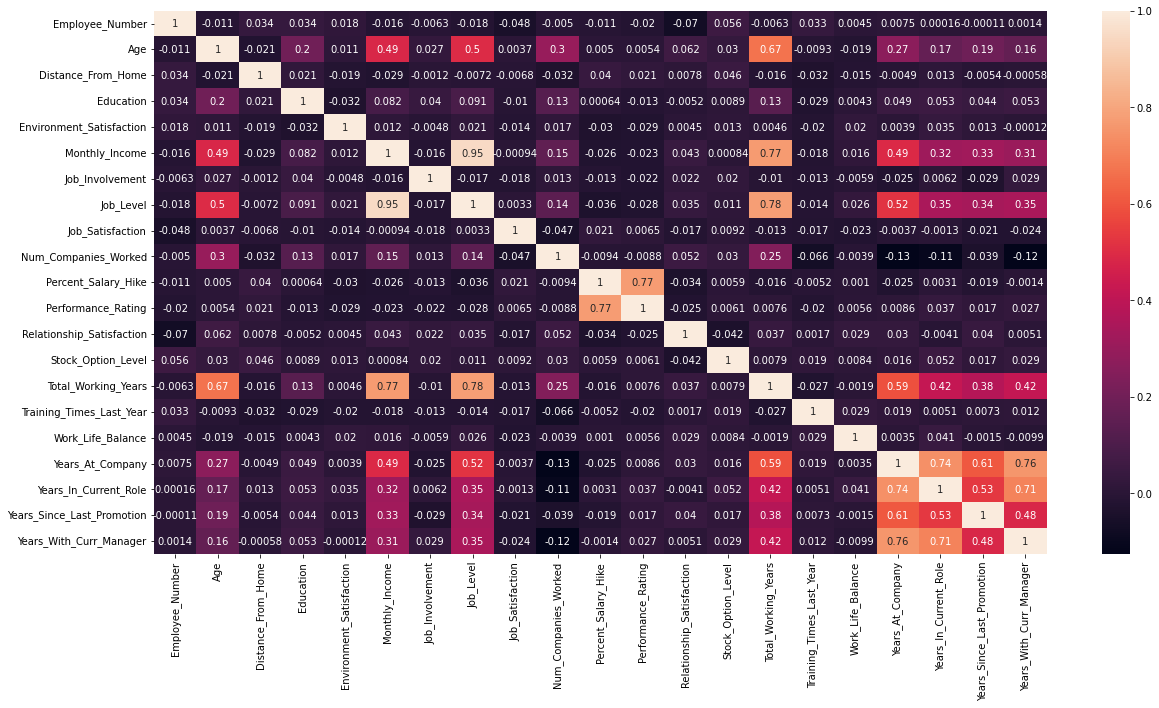

In [43]:
matplotlib.rcParams['figure.figsize'] = (20,10)
Correlation = attrition_df.corr()
sns.heatmap(Correlation, annot = True)

Above shown, **correlation** is another way to find a relation between two variables.

It measures the relationship between -1 to 1, with -1 showing no correlation while 1 shows the variables are highly correlated

## Exploratory Data Analysis 

First of all, lets check the attrition rate of the organisation:

AxesSubplot(0.32375,0.125;0.3775x0.755)


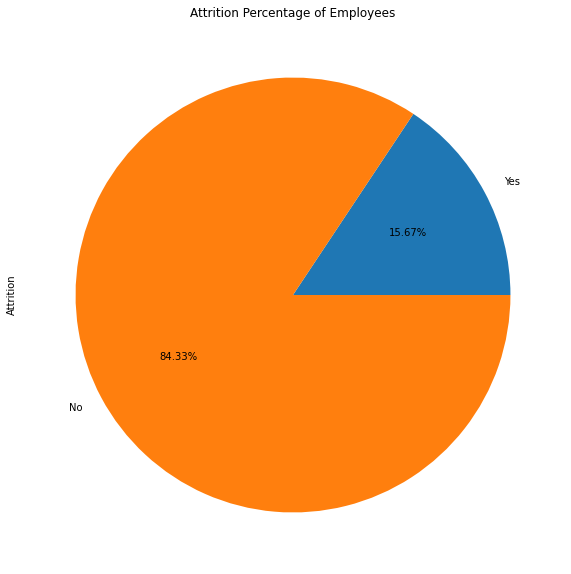

In [44]:
Employee_Attrition = list = (attrition_df.Attrition.value_counts(ascending = True))
print(Employee_Attrition.plot.pie(autopct = '%1.2f%%', title = "Attrition Percentage of Employees"))

#### Questions 1) Explore some below mentioned personal details of the employees:

- People of which age are leaving the organization the most.
- Which Gender is leaving the organization more.
- What is the relationship status of the employees.
- Distance to the home

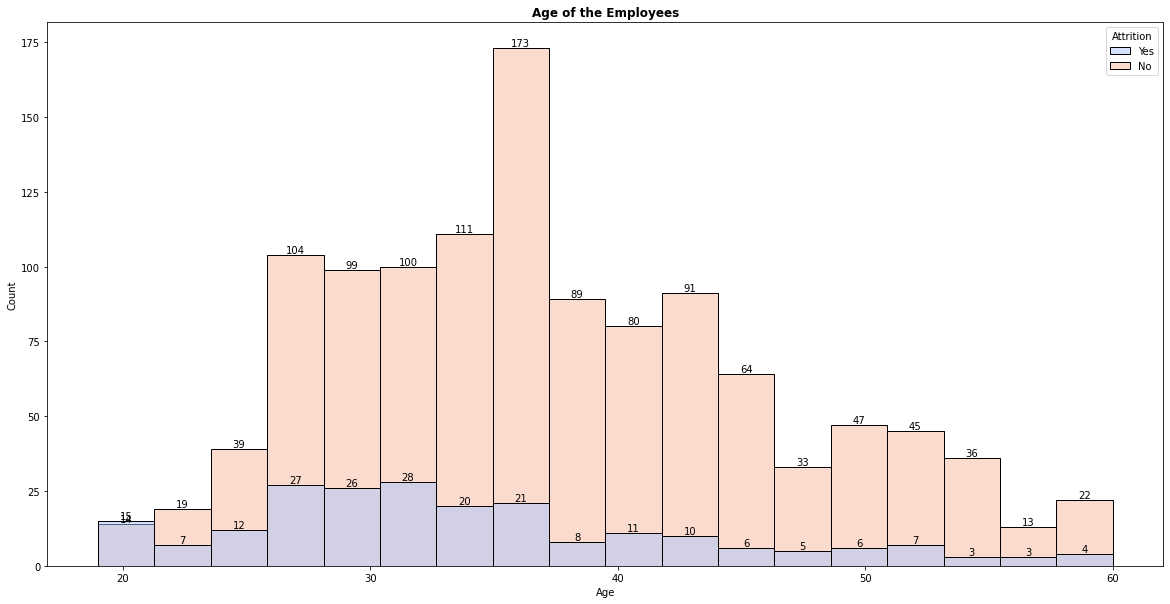

In [45]:
Employee_Age = sns.histplot(data = attrition_df, x = "Age", hue = "Attrition", palette = "coolwarm")
plt.title("Age of the Employees", weight = "bold")
for i in Employee_Age.containers:
    Employee_Age.bar_label(i,)

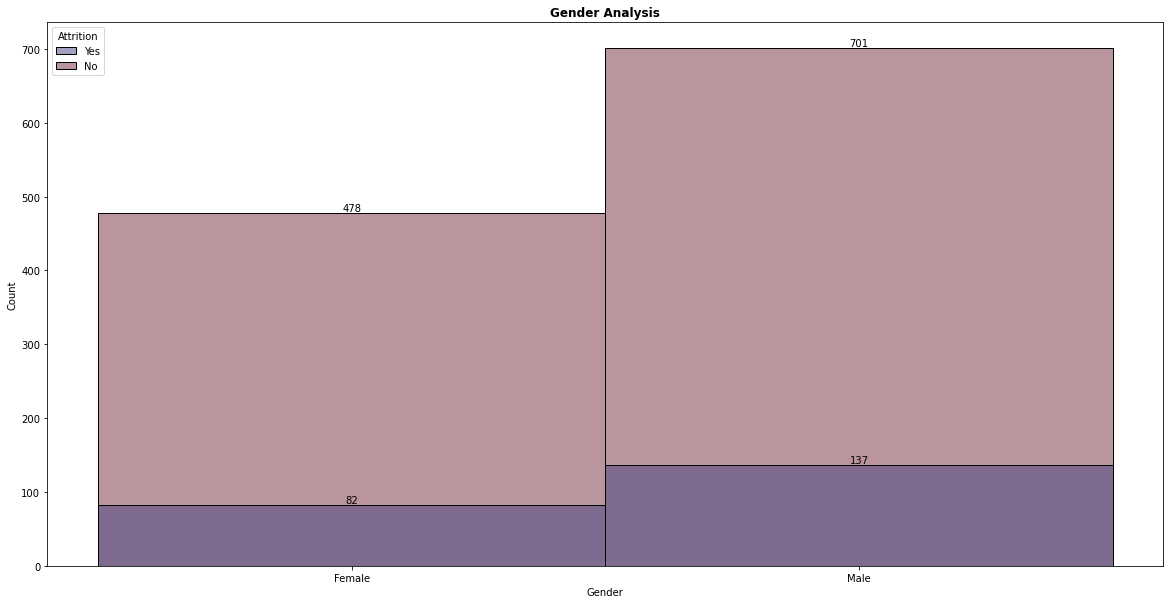

In [46]:
Gender_Analysis = sns.histplot(data = attrition_df, x = "Gender", hue = "Attrition", palette = "icefire")
plt.title("Gender Analysis", weight = "bold")
for i in Gender_Analysis.containers:
    Gender_Analysis.bar_label(i,)

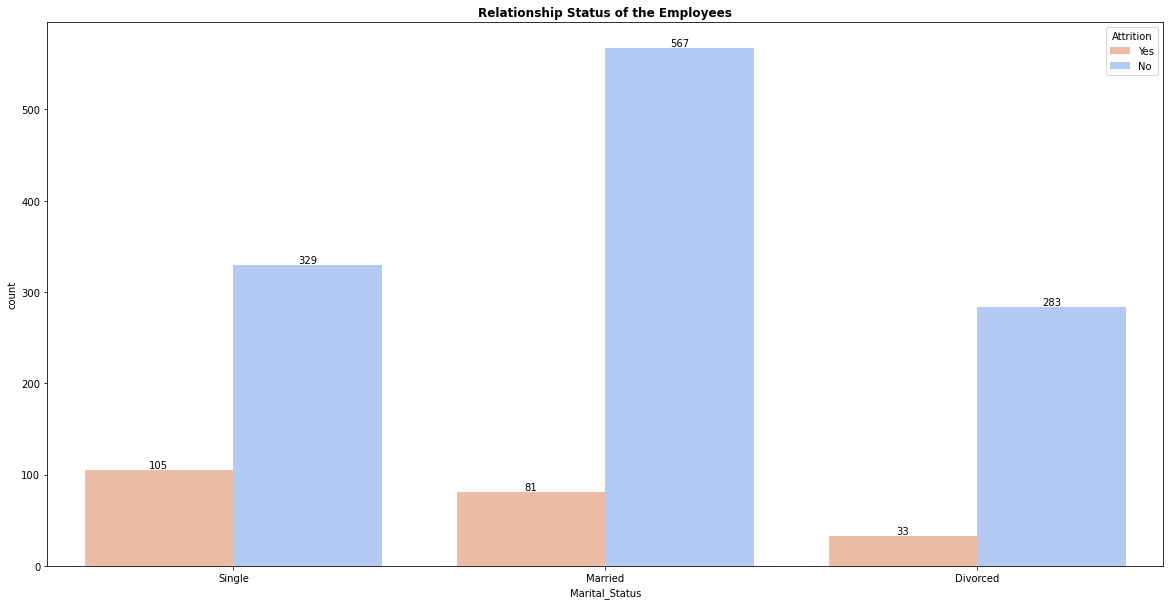

In [47]:
Relationship_Status = sns.countplot(data = attrition_df, x = "Marital_Status", hue = "Attrition", palette = "coolwarm_r")
plt.title("Relationship Status of the Employees", weight = "bold")
for i in Relationship_Status.containers:
    Relationship_Status.bar_label(i,)

Text(0.5, 1.0, 'Distance From Home')

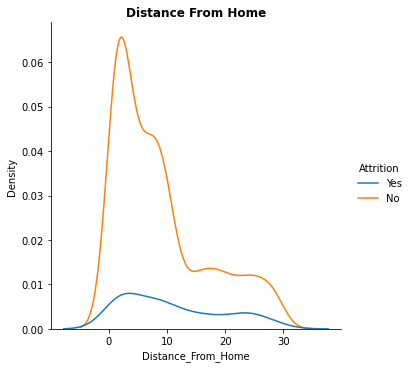

In [48]:
Distance = sns.displot(data=attrition_df, x = "Distance_From_Home", hue = "Attrition", kind = "kde")
plt.title("Distance From Home", weight = "bold")

**Conclusions**

- People around the age of 28 are leaving the most, mainly of Male gender who are single.
- Distance doesn't play major role in attrition, as people are continuing to stay in the company even when the distance is more than 20 kms while people whose home are near are also leaving.

#### Q2) Are the employees not incentivised properly due to which they feel less motivated towards work?

- From how long they are working in the organization and what is their monthly salary?
- Was the last hike satisfactory as per the performance?
- Do they have stock option?
- When they were promoted last?

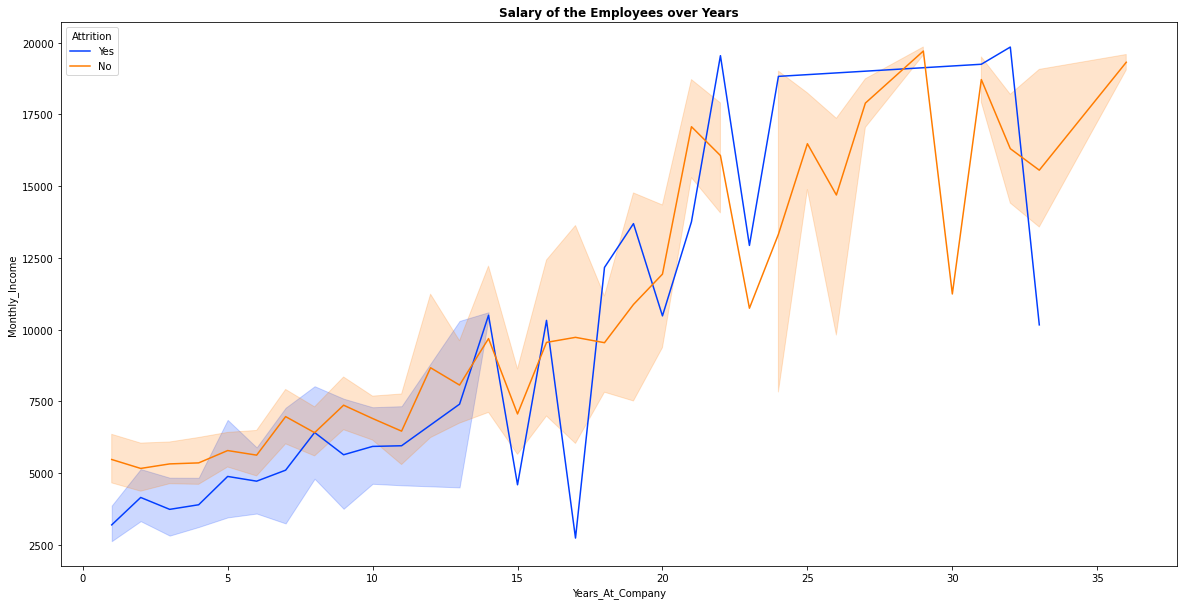

In [49]:
Salary_over_Years = sns.lineplot(data = attrition_df, x = "Years_At_Company", y = "Monthly_Income", hue = "Attrition", palette = "bright")
plt.title("Salary of the Employees over Years", weight = "bold")
for i in Salary_over_Years.containers:
    Salary_over_Years.bar_label(i,)

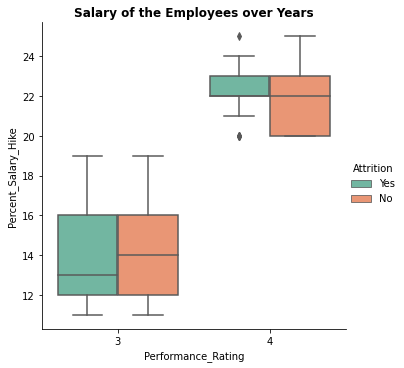

In [50]:
sns.catplot(x = "Performance_Rating", y = "Percent_Salary_Hike", hue = "Attrition", data=attrition_df, kind="box", palette = "Set2")
plt.title("Salary of the Employees over Years", weight = "bold")
for i in Salary_over_Years.containers:
    Salary_over_Years.bar_label(i,)

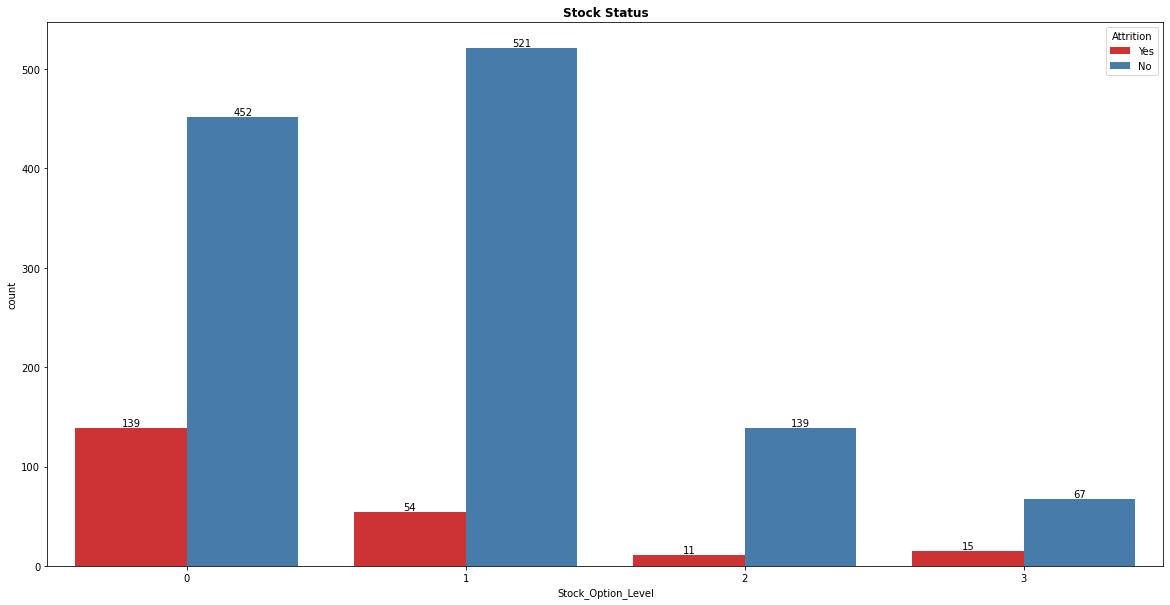

In [51]:
Stock = sns.countplot(data = attrition_df, x = "Stock_Option_Level", hue="Attrition", palette = "Set1")
plt.title("Stock Status", weight = "bold")
for i in Stock.containers:
    Stock.bar_label(i,)

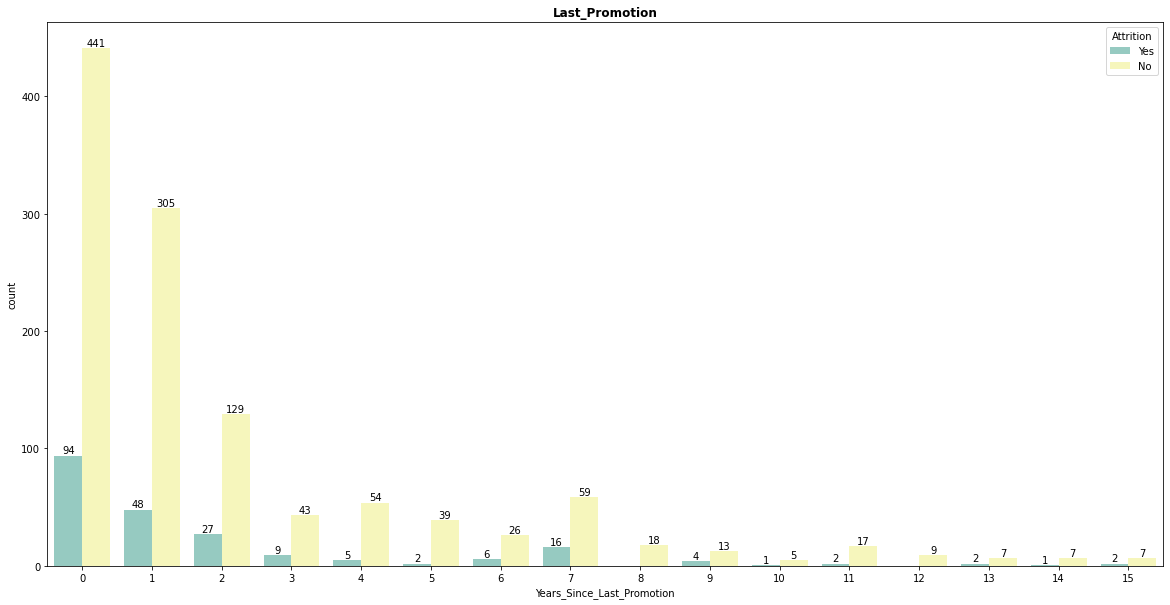

In [52]:
Last_Promotion = sns.countplot(data = attrition_df, x = "Years_Since_Last_Promotion", hue = "Attrition", palette = "Set3")
plt.title("Last_Promotion", weight = "bold")
for i in Last_Promotion.containers:
    Last_Promotion.bar_label(i,)

**Conclusion**

- People who are working for more than 20 years and have 
- People who received hike between just 12% - 16% are more intended to quit the job.
- People who dont have stock option prefer to leave while the ones with Stock Option Level 3 or 4 have better retaining rate.

#### Q3 Do the employees feel overloaded with work?

- How often they travel for Business?
- Do emplyees leave due to Overtime?

C:\Users\91870\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91870\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91870\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Travelling Frequency')

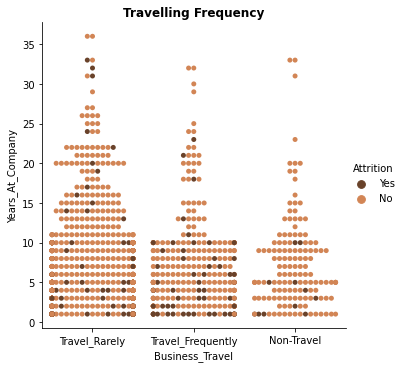

In [53]:
Travelling_Frequency = sns.catplot(x="Business_Travel", y = "Years_At_Company", hue = "Attrition", data=attrition_df, kind="swarm", palette = "copper")
plt.title("Travelling Frequency", weight = "bold")

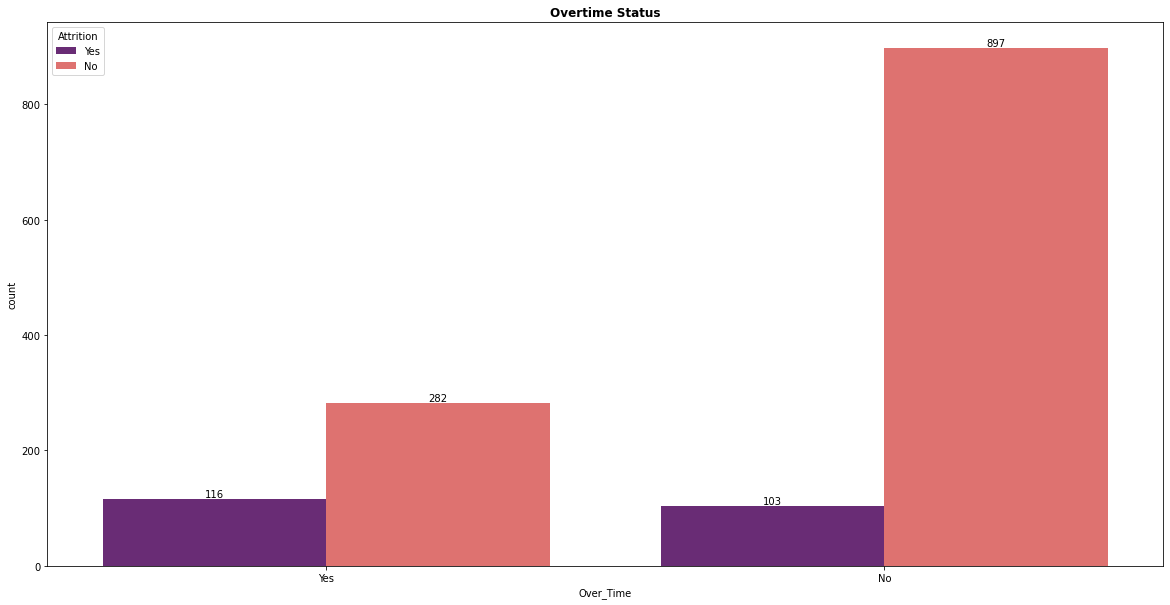

In [54]:
Overtime = sns.countplot(data = attrition_df, x = "Over_Time", hue = "Attrition", palette = "magma")
plt.title("Overtime Status", weight = "bold")
for i in Overtime.containers:
    Overtime.bar_label(i,)

**Conclusion**

- People who travel frequently are more likely to quit the job, specially people who have joined organisation in less than 5 years.

- Similarly, employees are leaving job due to Over Time as well.

#### Q4) Do the employee feel contented?

- Are their skills getting updated with regular trainings?
- How satisfied they are from there job?

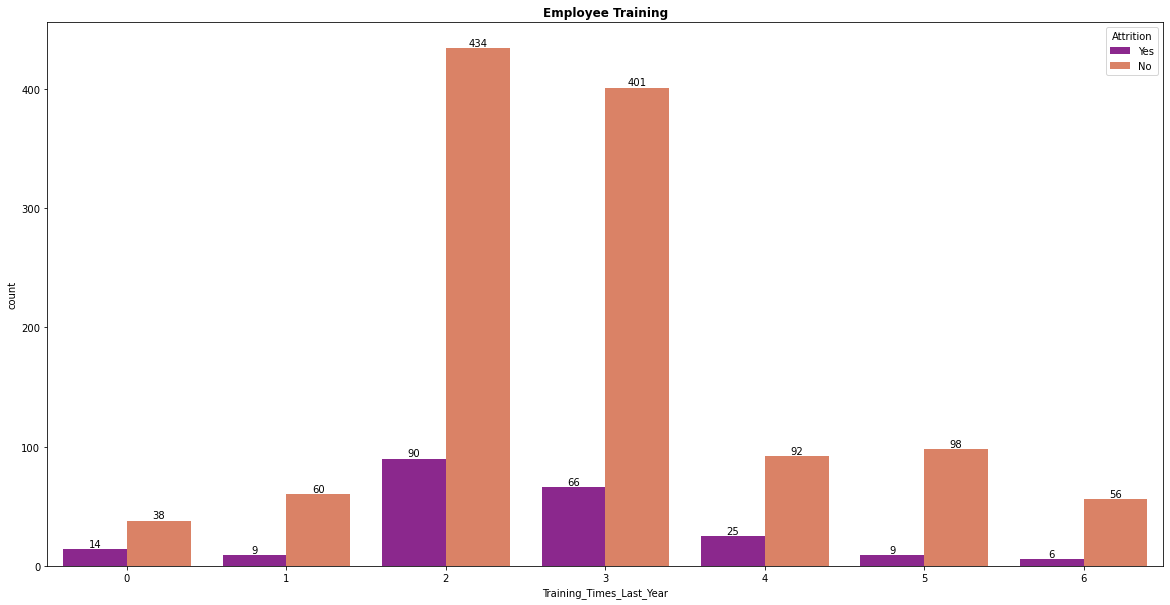

In [55]:
Employee_Training = sns.countplot(data = attrition_df, x = "Training_Times_Last_Year", hue="Attrition", palette = "plasma")
plt.title("Employee Training", weight = "bold")
for i in Employee_Training.containers:
    Employee_Training.bar_label(i,)

Text(0.5, 1.0, 'Job Satisfaction Level')

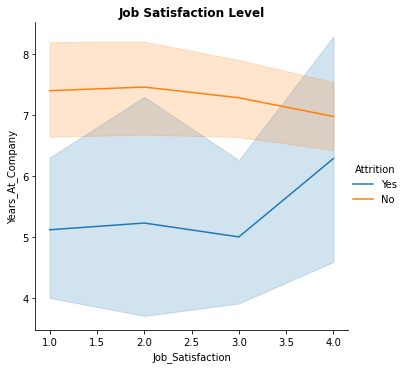

In [56]:
Job_Satisfaction = sns.relplot(data = attrition_df, x = "Job_Satisfaction", y = "Years_At_Company", hue = "Attrition", kind = "line")
plt.title("Job Satisfaction Level", weight = "bold")

**Conclusion**

- The attrition percentage is highest for people who have not received any training in the last year while there are people who are staying in the company from more than 7 years and have very less job satisfaction

#### Q5) Are the employees facing any difficulty in the work environment?

- From which department most of the people are leaving?
- Are they working under a same supervisor from a long time?
- Are the employees of some specific Job Role feel manipulated or over-burdened and quit?

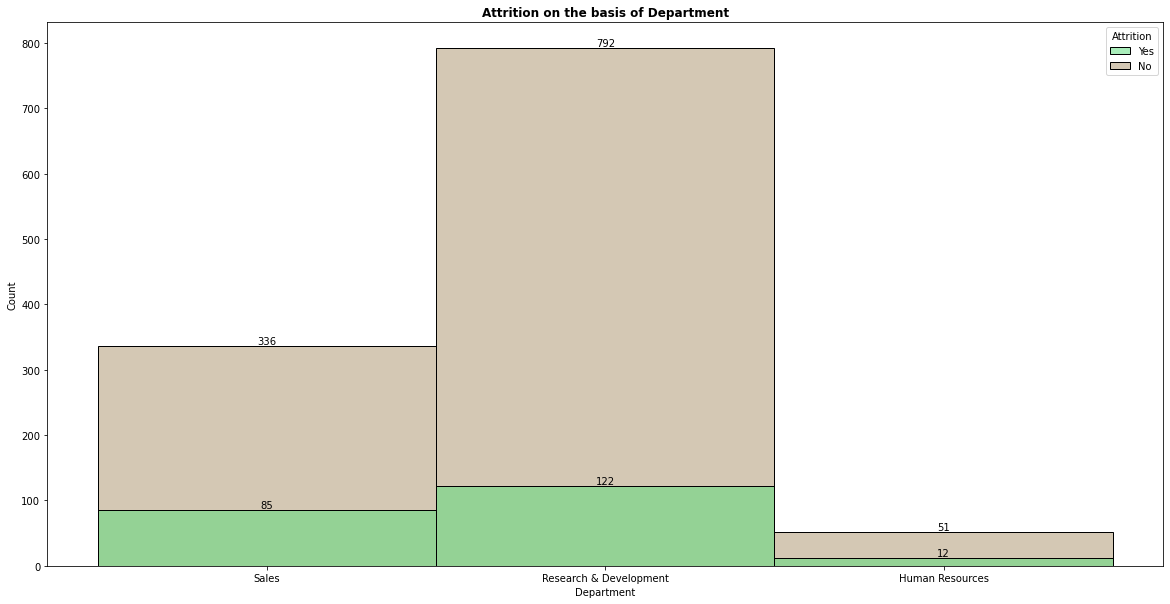

In [57]:
Department = sns.histplot(data = attrition_df, x = "Department", hue = "Attrition", palette = "terrain")
plt.title("Attrition on the basis of Department", weight = "bold")
for i in Department.containers:
    Department.bar_label(i,)

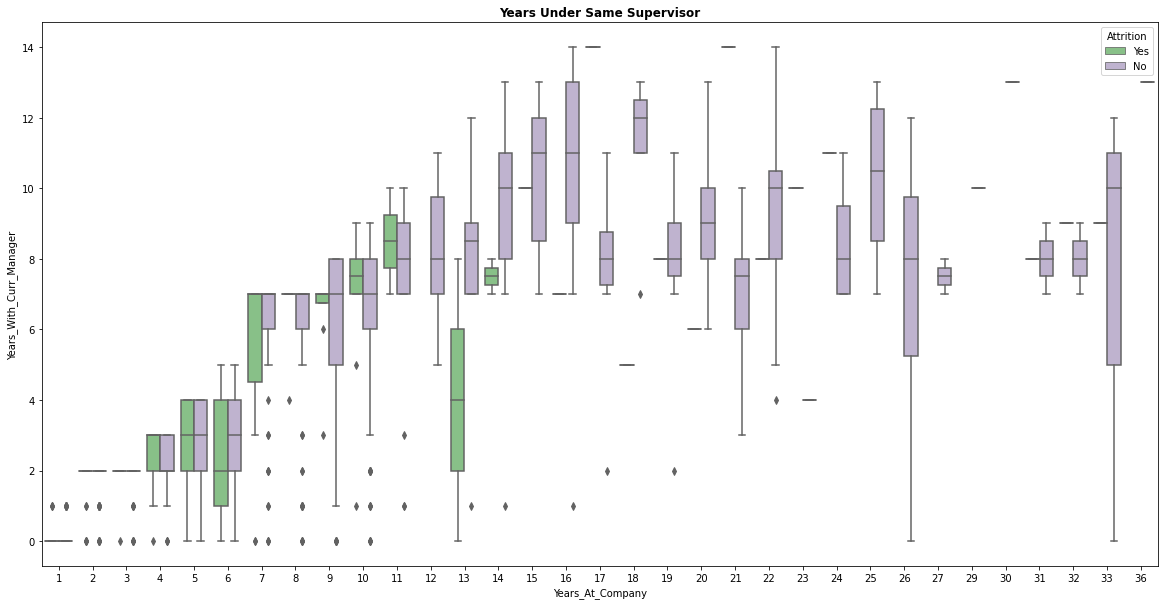

In [58]:
Same_Supervisor = sns.boxplot(data = attrition_df, x = "Years_At_Company", y = "Years_With_Curr_Manager", hue="Attrition", palette = "Accent")
plt.title("Years Under Same Supervisor", weight = "bold")
for i in Same_Supervisor.containers:
    Same_Supervisor.bar_label(i,)

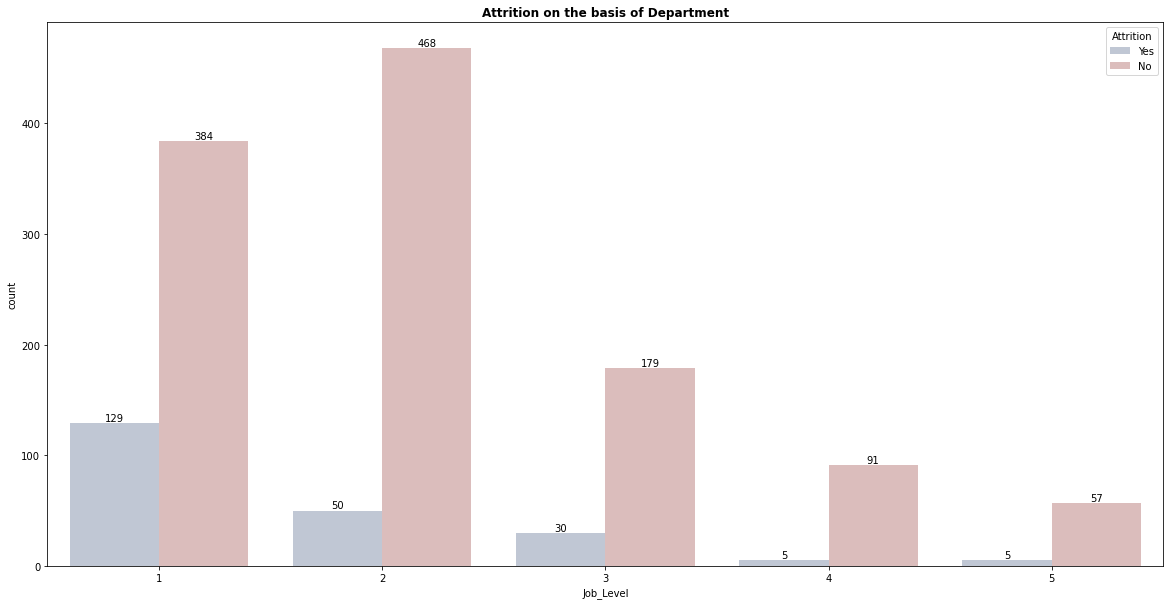

In [59]:
Job_Level = sns.countplot(data = attrition_df, x = "Job_Level", hue="Attrition", palette = "vlag")
plt.title("Attrition on the basis of Department", weight = "bold")
for i in Job_Level.containers:
    Job_Level.bar_label(i,)

**Conclusion**

- Sales department have high attrition rate, followed by HR department, while the highest number of employees have left from the Research and Development depatment but the attrition rate is low for it.
- Employees who are a part of the company for more than 5 years and are working under the same supervisor are more likely to quit their job.
- People from Job Level 1 have high attrition rate

#### Q6) Are we hiring the right personnel?

- How many companies they have changed, are we hiring people who have a habit of changing company frequently?

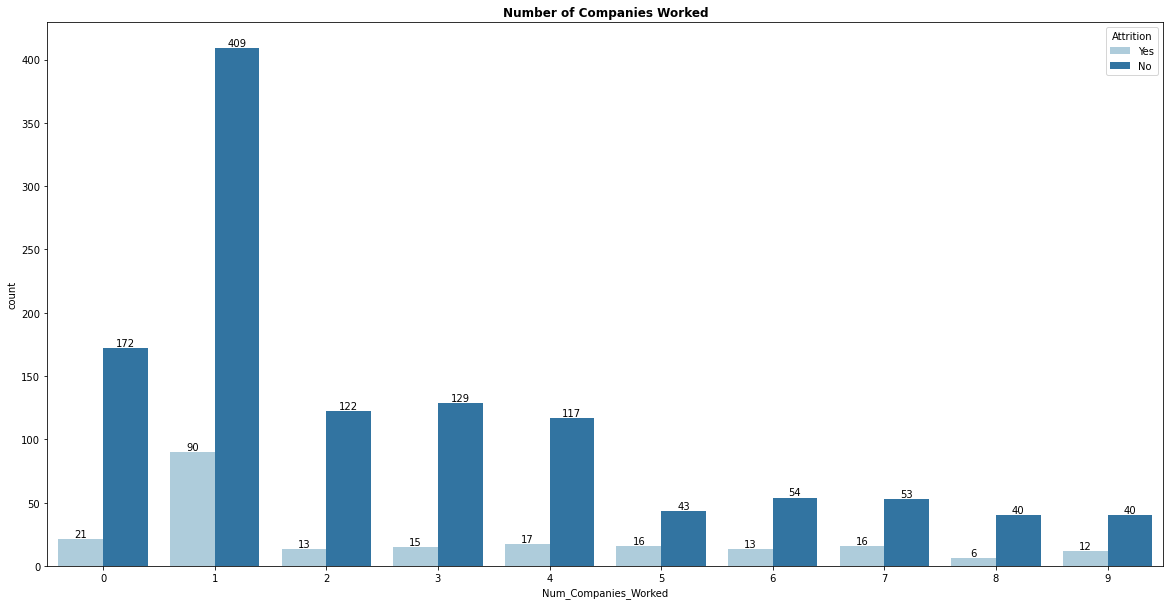

In [60]:
Companies_Worked = sns.countplot(data = attrition_df, x = "Num_Companies_Worked", hue="Attrition", palette = "Paired")
plt.title("Number of Companies Worked", weight = "bold")
for i in Companies_Worked.containers:
    Companies_Worked.bar_label(i,)

**Conclusion**

1) Although the count of people who have worked in more than 5 companies is less, but still the attrition rate is high for these employees when compared to the employees who have worked in less that 5 companies.

#### Q7) Is the work monotonous?

- From how long employees are working in Current Role?
- What is their Job Involvement?

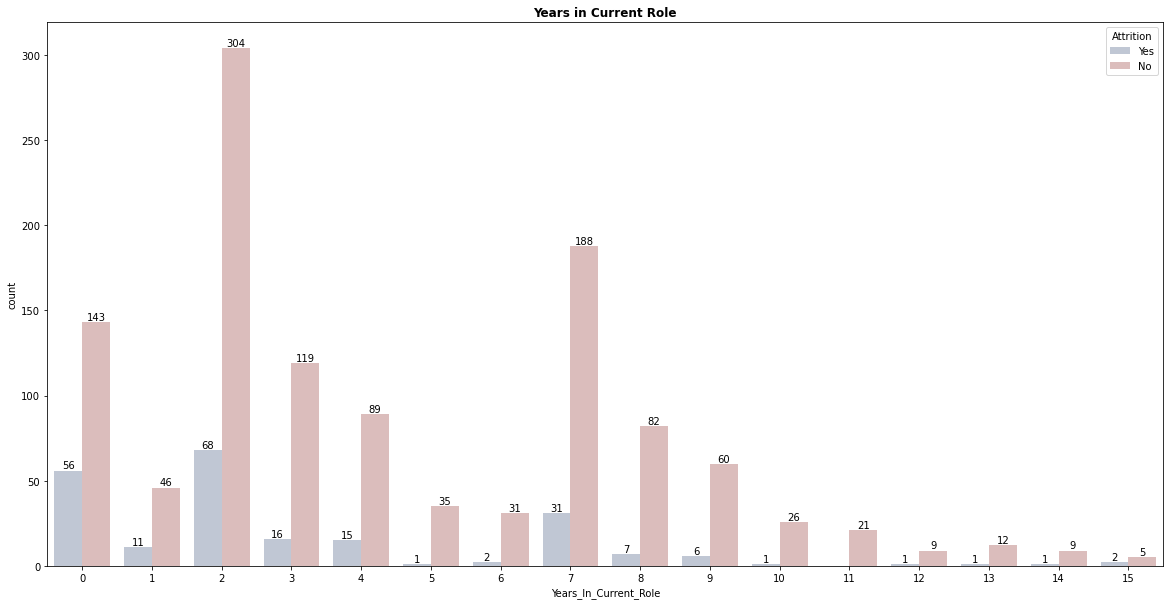

In [61]:
Current_Role = sns.countplot(data = attrition_df, x = "Years_In_Current_Role", hue="Attrition", palette = "vlag")
plt.title("Years in Current Role", weight = "bold")
for i in Current_Role.containers:
    Current_Role.bar_label(i,)

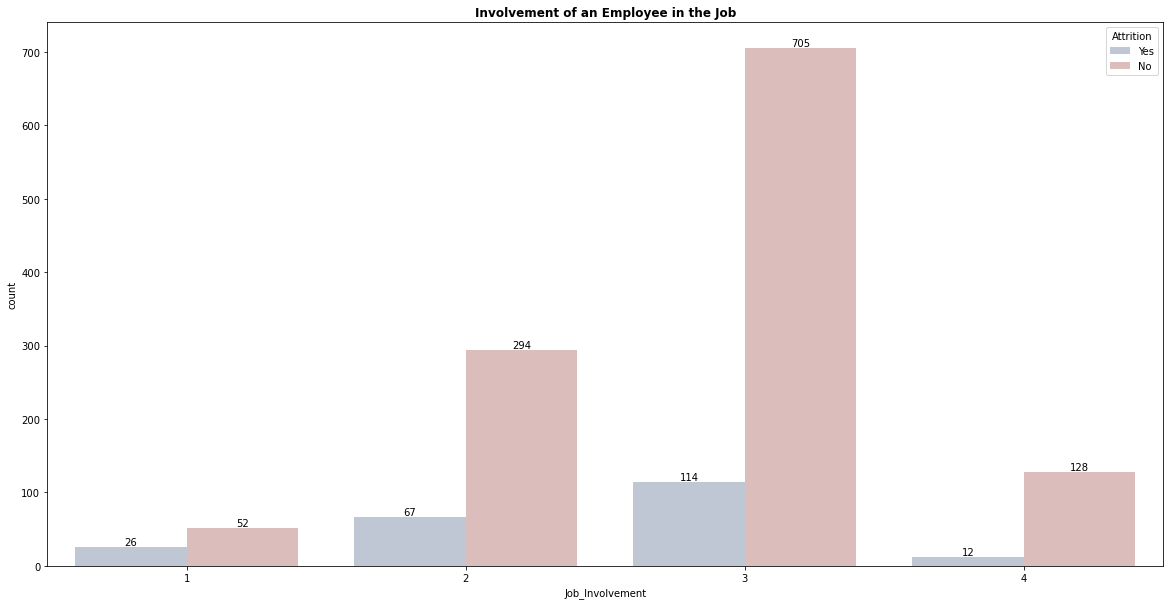

In [62]:
Job_Involvement = sns.countplot(data = attrition_df, x = "Job_Involvement", hue="Attrition", palette = "vlag")
plt.title("Involvement of an Employee in the Job", weight = "bold")
for i in Job_Involvement.containers:
    Job_Involvement.bar_label(i,)

**Conclusion**

- Most of the people are leaving within an year of joining, while the attriton rate is low for employees who are working in the company for more than 9 years.
- Employees who are less involved in their work are more likely to quit than the ones who have more job involvement.

## Recommendations

From the above exploratory data analysis the following points can be suggested:

- Male employees who are single and are of young age are more likely to leave the organization, especially of the age 20 years than the employees who are above 40 years of age. To drop the attrition rate, it is recommended to hire more women and people who are above the age of 35. The company is not hiring much divorced people but the attrition rate is very less for them.


- The attrition rate increases when the salary of an employee increases, irrespective of the years, the employee has worked in the company, the attrition rate suddenly spike after crossing 10k of monthly income. At the same time, employees who have received a low hike of 12% to 16% are also tend to quit even after a performance rating of 3. 


- Good performing employees prefer t stay at company when offered a good hike. Apart from salary, retention of an employee increases when they are incentivised with stock option.


- Employees who travel for business very frequently may feel overburder and prefer to leave the organization. Similarly, very few employees have done overtime, but it is not appreciated by them which increased the attrition rate.


- The attrition rate is high among employees who are getting 3 or less trainings when compared to the ones who are getting mre than 3 training. It is suggested to add more trainings to improve the skillset of employees so they feel accompished in their career growth. This can be the reason why employees are having low Job Satisfaction, employees who are part of the organization for more  than 7 years are also having job satisfaction of just 1 level.


- Employees from the sale department have the highest attrition rate, followed by human resource department while the people who are under the supervision of same manager for over 2 years are more likely to quit the job. Employees at the ground level may feel overburdened and quit job, increasing the attition rate for Job Level 1.

## References

- Seaborn.com (2012). Available online at https://seaborn.pydata.org/



- Kaggle.com (n.d.). Available online at https://www.kaggle.com/code/rohitsahoo/ibm-employee-attrition-analysis-and-prediction



- Python.org (2019). Available online at https://docs.python.org/3/tutorial/index.html



- Youtube.com (n.d.). Available online at https://www.youtube.com/c/codebasics